In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LassoCV,Lasso,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,make_scorer
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
data_2 = pd.read_csv('/content/drive/MyDrive/Ijaz - Updated Files/Dissertation - Masters Project/Loan Interest Rate Prediction (ML Model Development)/Interest Rate Model Development - ML/interest_rate_df_engineered.csv')
display(data_2.shape)
display(data_2.head())

(757494, 48)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,Team Leadern Customer Ops & Systems,10,...,0.0,Jan-2016,885.46,Feb-2016,Dec-2015,0,0,0.0,114834.0,59900.0
1,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,Medical Assistant,1,...,0.0,Jan-2016,333.14,Feb-2016,Jan-2016,0,0,0.0,14123.0,15100.0
2,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10,...,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0,0,0.0,267646.0,61100.0
3,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,On road manager,10,...,0.0,Sep-2015,119.17,Unknown,Jan-2016,0,0,15386.0,13605.0,8100.0
4,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2,...,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0,0,1514.0,272492.0,15400.0


In [4]:
print(data_2.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


In [5]:
num_cols = data_2.select_dtypes(include= ['float64','int64']).columns
cat_cols = data_2.select_dtypes(include= ['object']).columns
print(len(num_cols)) # 30 Numerical Variables
print(len(cat_cols)) # 18 Categorical Variables

30
18


In [6]:
# display(data_2[num_cols].nunique())
display(data_2[num_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757494 entries, 0 to 757493
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   757494 non-null  float64
 1   funded_amnt                 757494 non-null  float64
 2   funded_amnt_inv             757494 non-null  float64
 3   int_rate                    757494 non-null  float64
 4   installment                 757494 non-null  float64
 5   emp_length                  757494 non-null  int64  
 6   annual_inc                  757494 non-null  float64
 7   dti                         757494 non-null  float64
 8   delinq_2yrs                 757494 non-null  int64  
 9   inq_last_6mths              757494 non-null  int64  
 10  open_acc                    757494 non-null  int64  
 11  pub_rec                     757494 non-null  int64  
 12  revol_bal                   757494 non-null  float64
 13  revol_util    

None

In [7]:
display(data_2[cat_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757494 entries, 0 to 757493
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 757494 non-null  object
 1   grade                757494 non-null  object
 2   sub_grade            757494 non-null  object
 3   emp_title            757494 non-null  object
 4   home_ownership       757494 non-null  object
 5   verification_status  757494 non-null  object
 6   issue_d              757494 non-null  object
 7   loan_status          757494 non-null  object
 8   pymnt_plan           757494 non-null  object
 9   purpose              757494 non-null  object
 10  title                757494 non-null  object
 11  zip_code             757494 non-null  object
 12  addr_state           757494 non-null  object
 13  earliest_cr_line     757494 non-null  object
 14  initial_list_status  757494 non-null  object
 15  last_pymnt_d         757494 non-nu

None

In [8]:
print(data_2['emp_length'].unique())

[10  1  2  4  3  7  6  9  5  0  8]


In [9]:
# Create a copy of the data frame so that the original data frame is preserved
encoded_data = data_2.copy()

# Define the variables that should be kept based on your selections, including 'int_rate'
selected_vars = [
    'int_rate', 'loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_util',
    'out_prncp', 'total_rec_int', 'last_pymnt_amnt', 'collection_recovery_fee',
    'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'open_acc', 'emp_length', 'term', 'sub_grade',
    'home_ownership', 'verification_status', 'loan_status',
    'addr_state', 'purpose', 'initial_list_status'
]

# Retain only the selected variables in the data frame
encoded_data = encoded_data[selected_vars]

# Define the numerical variables (Continuous and Discrete)
numerical_cols = [
    'loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_util',
    'out_prncp', 'total_rec_int', 'last_pymnt_amnt', 'collection_recovery_fee',
    'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'collections_12_mths_ex_med',
    'acc_now_delinq', 'open_acc'
]

# Define the categorical variables for Label Encoding and One-Hot Encoding
label_encode_cols = ['sub_grade', 'emp_length']  # Ordinal variables
one_hot_encode_cols = ['term', 'home_ownership', 'verification_status',
                       'loan_status', 'purpose', 'addr_state', 'initial_list_status']  # Nominal variables

# Apply Label Encoding to the ordinal categorical variables
label_encoders = {col: LabelEncoder() for col in label_encode_cols}
for col in label_encode_cols:
    encoded_data[col] = label_encoders[col].fit_transform(encoded_data[col])

# Apply One-Hot Encoding to the nominal categorical variables
encoded_data = pd.get_dummies(encoded_data, columns=one_hot_encode_cols)

# Print the final shape of the processed dataset
print("Dimensions of the Processed Data:", encoded_data.shape)
display(encoded_data.head())

Dimensions of the Processed Data: (757494, 104)


,int_rate,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,10.99,27050.0,885.46,55000.0,22.87,61.2,10018.90,4219.94,885.46,0.0,...,False,False,False,False,False,False,False,False,False,True
1,13.98,9750.0,333.14,26000.0,25.12,52.8,3710.96,1955.79,333.14,0.0,...,False,False,False,False,False,False,False,False,True,False
2,6.62,12000.0,368.45,105000.0,14.05,21.6,4266.62,1109.42,368.45,0.0,...,False,False,False,False,False,False,False,False,False,True
3,13.53,12000.0,407.40,40000.0,16.94,68.8,0.00,1359.78,119.17,0.0,...,False,False,False,False,False,False,False,False,False,True
4,8.90,15000.0,476.30,63000.0,16.51,74.2,5449.27,1880.47,476.30,0.0,...,False,False,False,False,False,False,False,False,False,True


Train and Test Split (80 : 20) and Lasso CV (Feature Selection 1)

Identify the best Lasso CV (Alpha Coefficient)

In [10]:
# Split the data into training and test.
# The data is split in the ratio 80% for training and 20% for testing.

# Define the X [features] and Y [interest rate]
X = encoded_data.drop(columns = ['int_rate'])
y = encoded_data['int_rate']

# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Scale the numerical variables
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Inspect the variables after scaling
display(pd.DataFrame(X_train,columns = numerical_cols).describe())

# Implement Lasso Regression with Cross validation and Determine the Best Alpha
lasso_cv = LassoCV(alphas = np.logspace(-4,4,100),cv = 10,random_state = 42,max_iter = 10000,tol = 1e-4,n_jobs = -1)
lasso_cv.fit(X_train,y_train)

best_alpha = lasso_cv.alpha_
print(f"Best Alpha found by LassoCV: {best_alpha}")

lasso_coefficients = pd.Series(lasso_cv.coef_,index = X.columns)

,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc
count,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05
mean,2.523268e-17,4.449957e-16,-9.571066e-16,-7.566522e-16,1.955767e-16,-4.095386e-16,1.378886e-16,-4.609772e-17,4.256256e-18,4.980875e-17,7.926252e-18,1.880726e-17,-2.110540e-17,-1.997978e-17,-1.653491e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.675105e+00,-1.742750e+00,-1.930431e+00,-2.242425e+00,-2.367863e+00,-1.076719e+00,-8.479672e-01,-4.427968e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-2.193977e+00
25%,-7.773707e-01,-7.232971e-01,-7.204962e-01,-7.503525e-01,-7.325055e-01,-9.480732e-01,-6.347185e-01,-3.835978e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-7.000614e-01
50%,-1.669114e-01,-2.201218e-01,-2.140119e-01,-5.760461e-02,3.179969e-02,-1.781871e-01,-3.255272e-01,-3.468853e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-1.398429e-01
75%,5.991552e-01,5.623643e-01,4.894386e-01,7.090202e-01,7.704858e-01,6.174214e-01,2.418165e-01,-2.788748e-01,-8.094931e-02,-3.730718e-01,3.486455e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,4.203757e-01
max,2.394624e+00,4.172898e+00,4.175519e+00,2.600755e+00,3.573211e+01,3.064244e+00,1.004566e+01,7.167943e+00,1.072885e+02,4.387108e+01,7.682158e+00,1.453868e+02,1.442965e+02,1.728115e+02,1.461258e+01


Best Alpha found by LassoCV: 0.0001


Covergence Plot (Mean Squared Errors and Alphas)

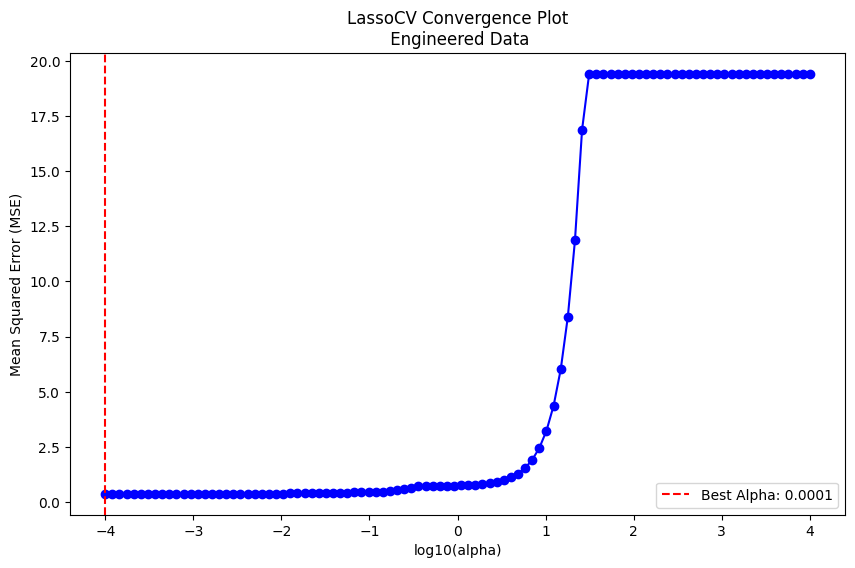

In [11]:
# Extract the Mean Squared Errors and Alphas
mse_path = lasso_cv.mse_path_.mean(axis = 1)
alphas = lasso_cv.alphas_

# Plot the Mean Squared Errors for each Alpha
plt.figure(figsize = (10,6))
plt.plot(np.log10(alphas),mse_path,marker = 'o',color = 'b')
plt.axvline(np.log10(best_alpha),linestyle = '--',color = 'r',label = f'Best Alpha: {best_alpha:.4f}')
plt.xlabel('log10(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('LassoCV Convergence Plot\n Engineered Data')
plt.legend()
plt.show()

Extract the Top 30 Features from the Lasso Regression Model (Using the best alpha)

Number of Important features Selected by Lasso: 59
Important features:
 loan_amnt                             -4.280000e-02
installment                            1.250397e-01
annual_inc                            -3.610116e-02
dti                                   -2.908130e-02
revol_util                             6.484007e-02
out_prncp                             -3.706741e-01
total_rec_int                          3.685430e-01
last_pymnt_amnt                       -2.077151e-01
collection_recovery_fee               -2.587289e-02
delinq_2yrs                           -2.599199e-03
inq_last_6mths                         3.152268e-02
pub_rec                               -1.124263e-02
collections_12_mths_ex_med            -8.538458e-03
acc_now_delinq                         4.792947e-04
open_acc                               6.120286e-04
emp_length                             1.592837e-03
sub_grade                              6.460357e-01
term_36 months                        -1.224

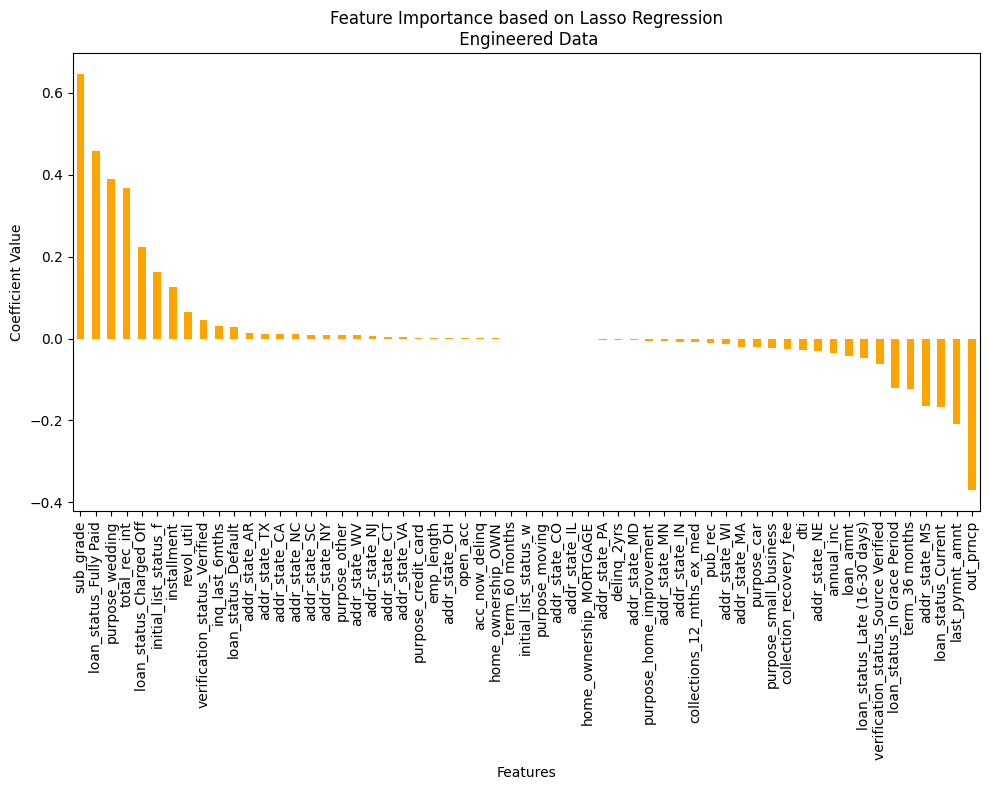

<Figure size 640x480 with 0 Axes>

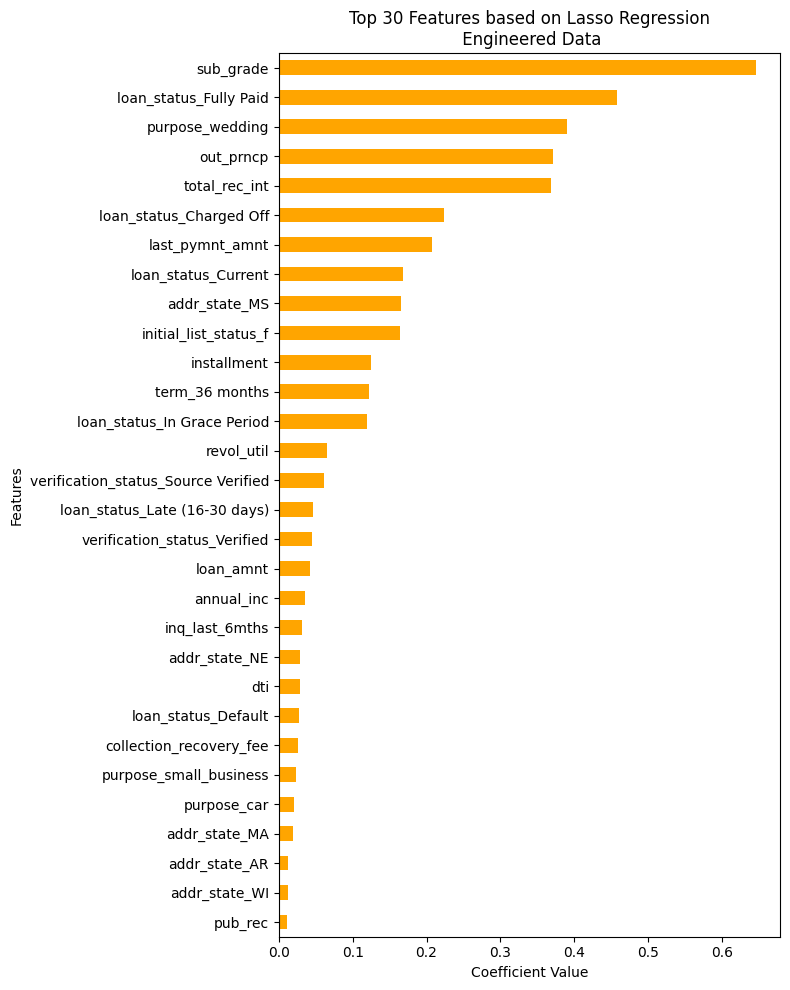

In [12]:
# Extract the important features selected by Lasso (non-zero coefficients)
important_features = lasso_coefficients[lasso_coefficients != 0]
print(f"Number of Important features Selected by Lasso: {len(important_features)}")

# Check if there are any important features
if len(important_features) > 0:
    print("Important features:\n", important_features)

    # Sort the important features by their coefficients
    important_features = important_features.sort_values(ascending=False)

    # Plot the Feature Importance
    plt.figure(figsize=(10,8))
    important_features.plot(kind='bar',color='orange')
    plt.title("Feature Importance based on Lasso Regression\n Engineered Data")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()
    plt.show()
    plt.clf()

    # Plot the Top 30 Features obtained from Feature Importance
    top_30_features = lasso_coefficients.abs().sort_values(ascending=False).head(30)
    plt.figure(figsize=(8,10))
    top_30_features.sort_values().plot(kind='barh',color='orange')
    plt.title('Top 30 Features based on Lasso Regression\n Engineered Data')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("No important features were selected by Lasso (all coefficients are zero).")

The number of features that is elimated by Lasso Regression

In [13]:
eliminated_features = lasso_coefficients[lasso_coefficients == 0]
print(len(eliminated_features))

44


Train MSE: 0.3744422086977248
Test MSE: 0.377139615635592
Train RMSE: 0.6119168315202033
Test RMSE: 0.6141169397074079
Train R2: 0.9807090611886056
Test R2: 0.9805727938152653


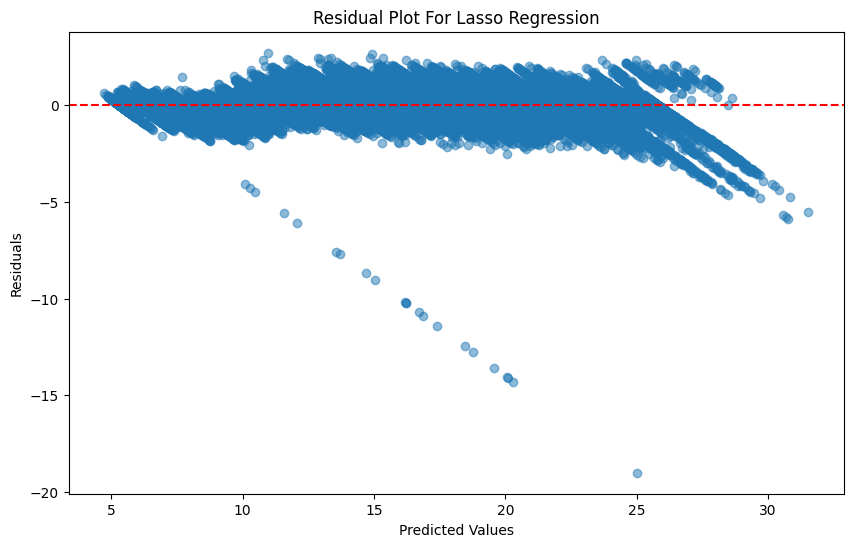

<Figure size 640x480 with 0 Axes>

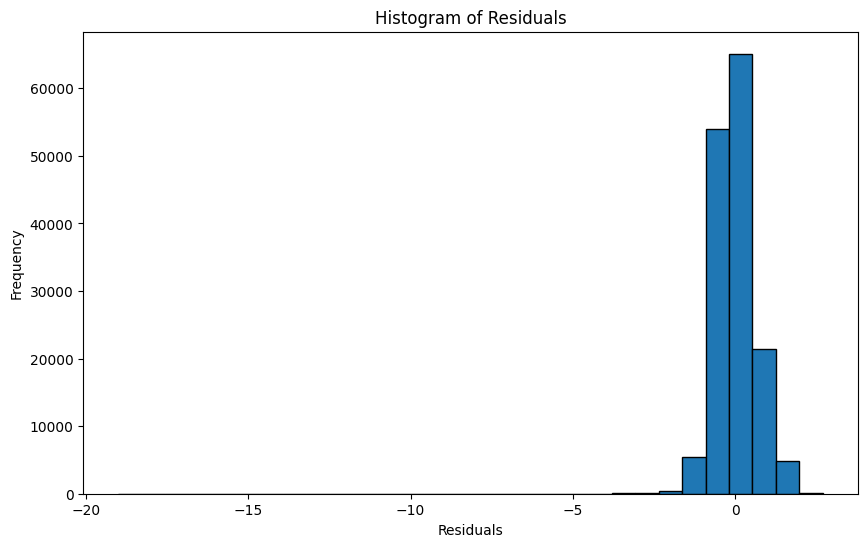

<Figure size 640x480 with 0 Axes>

In [14]:
# Determine the model pefromance on the training and testing data
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

# MSE of y_train_pred and y_test_pred
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# RMSE of y_train_pred and y_test_pred
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# R2 of y_train_pred and y_test_pred
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

print("Train R2:", train_r2)
print("Test R2:", test_r2)


# Estimate the Residuals for the y_test_pred
residuals = y_test - y_test_pred

# Plot the Residuals for the y_test_pred
plt.figure(figsize = (10,6))
plt.scatter(y_test_pred,residuals,alpha = 0.5)
plt.axhline(y = 0,color = 'r',linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot For Lasso Regression')
plt.show()
plt.clf()

# Histogram of Residuals
plt.figure(figsize = (10,6))
plt.hist(residuals,bins = 30,edgecolor = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
plt.clf()

In [15]:
# Inspect the variables for inspecting scaling
display(pd.DataFrame(X_train,columns = numerical_cols).describe())

,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc
count,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05
mean,2.523268e-17,4.449957e-16,-9.571066e-16,-7.566522e-16,1.955767e-16,-4.095386e-16,1.378886e-16,-4.609772e-17,4.256256e-18,4.980875e-17,7.926252e-18,1.880726e-17,-2.110540e-17,-1.997978e-17,-1.653491e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.675105e+00,-1.742750e+00,-1.930431e+00,-2.242425e+00,-2.367863e+00,-1.076719e+00,-8.479672e-01,-4.427968e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-2.193977e+00
25%,-7.773707e-01,-7.232971e-01,-7.204962e-01,-7.503525e-01,-7.325055e-01,-9.480732e-01,-6.347185e-01,-3.835978e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-7.000614e-01
50%,-1.669114e-01,-2.201218e-01,-2.140119e-01,-5.760461e-02,3.179969e-02,-1.781871e-01,-3.255272e-01,-3.468853e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-1.398429e-01
75%,5.991552e-01,5.623643e-01,4.894386e-01,7.090202e-01,7.704858e-01,6.174214e-01,2.418165e-01,-2.788748e-01,-8.094931e-02,-3.730718e-01,3.486455e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,4.203757e-01
max,2.394624e+00,4.172898e+00,4.175519e+00,2.600755e+00,3.573211e+01,3.064244e+00,1.004566e+01,7.167943e+00,1.072885e+02,4.387108e+01,7.682158e+00,1.453868e+02,1.442965e+02,1.728115e+02,1.461258e+01


Simple XG Boost (Feature Importance)

In [16]:
xgb_simple = xgb.XGBRegressor(random_state = 42)

xgb_simple.fit(X_train,y_train)

y_train_pred = xgb_simple.predict(X_train)
y_test_pred = xgb_simple.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)

print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)

Train RMSE: 0.30136522454794784
Train R2: 0.9953209806868838
Test RMSE: 0.3224798574383153
Test R2: 0.9946431019441102


Feature Importance Plots (XG Boost)

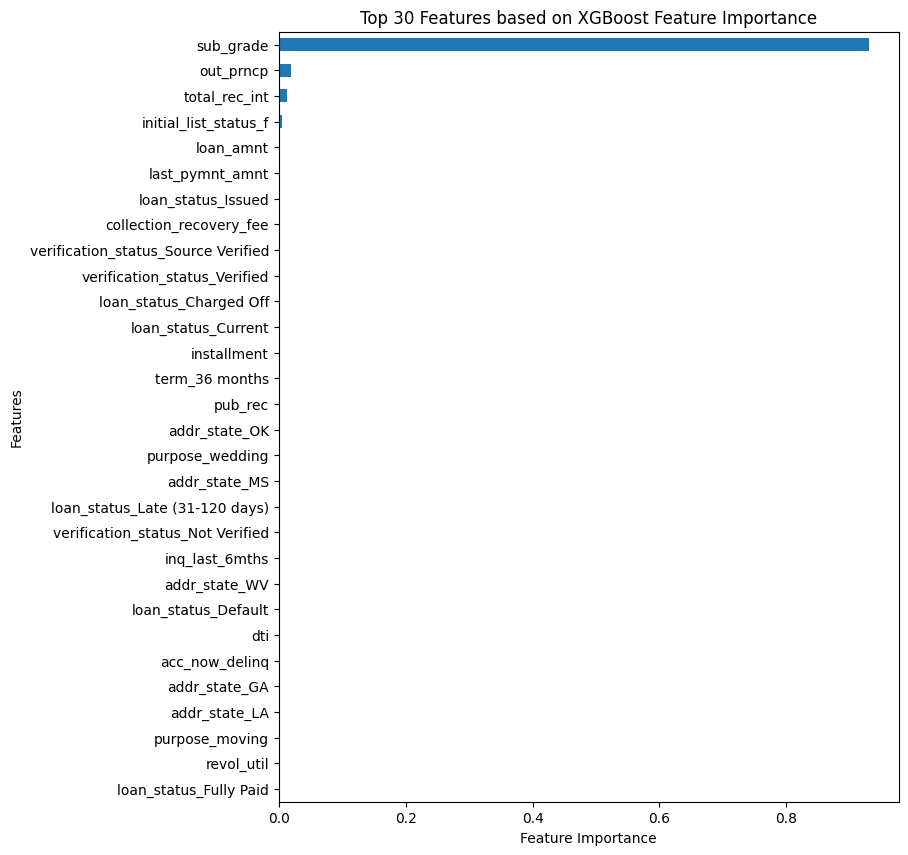

<Figure size 640x480 with 0 Axes>

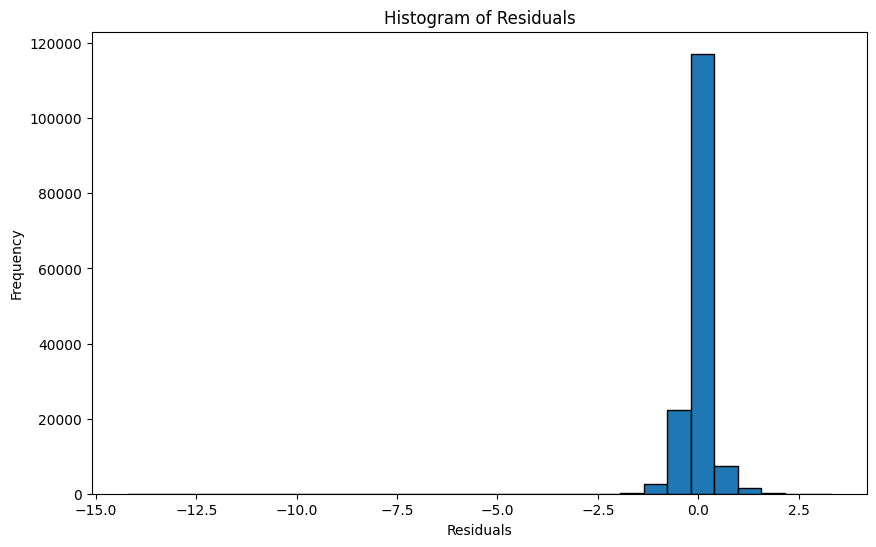

In [17]:
# Plot Feature Importance
xgb_importances = xgb_simple.feature_importances_

xgb_feature_importance = pd.Series(xgb_importances,index = X.columns)
top_30_xgb_features = xgb_feature_importance.sort_values(ascending = False).head(30)

# Plot the Top 30 Features obtained from Feature Importance
plt.figure(figsize = (8, 10))
top_30_xgb_features.sort_values().plot(kind = 'barh')
plt.title('Top 30 Features based on XGBoost Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
plt.clf()

# Estimate the Residuals for xgb_simple
residuals = y_test - y_test_pred

# Histogram of Residuals
plt.figure(figsize = (10,6))
plt.hist(residuals,bins = 30,edgecolor = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Cross Validation (Simple XG Boost)

In [18]:
rmse_scorer = make_scorer(mean_squared_error,squared = False)

cv_scores = cross_val_score(xgb_simple,X_train,y_train,cv = 5,scoring = rmse_scorer,verbose = 1)

cv_r2_scores = cross_val_score(xgb_simple,X_train,y_train,cv = 5,scoring = 'r2',verbose = 1)

# Print the RMSE results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean CV RMSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV RMSE: {np.std(cv_scores)}")

# Print the R2 results
print(f"Cross-Validation R2 Scores: {cv_r2_scores}")
print(f"Mean CV R2: {np.mean(cv_r2_scores)}")
print(f"Standard Deviation of CV R2: {np.std(cv_r2_scores)}")

Cross-Validation RMSE Scores: [0.32544915 0.31488498 0.31984369 0.3220996  0.31702214]
Mean CV RMSE: 0.3198599138034545
Standard Deviation of CV RMSE: 0.0037164210827571867
Cross-Validation R2 Scores: [0.99453381 0.99491607 0.99473168 0.99465211 0.99480671]
Mean CV R2: 0.9947280772867264
Standard Deviation of CV R2: 0.0001304188906260132


Inspect for scaling before next algorithm

In [19]:
display(X_train[numerical_cols].describe())

,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc
count,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05
mean,2.523268e-17,4.449957e-16,-9.571066e-16,-7.566522e-16,1.955767e-16,-4.095386e-16,1.378886e-16,-4.609772e-17,4.256256e-18,4.980875e-17,7.926252e-18,1.880726e-17,-2.110540e-17,-1.997978e-17,-1.653491e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.675105e+00,-1.742750e+00,-1.930431e+00,-2.242425e+00,-2.367863e+00,-1.076719e+00,-8.479672e-01,-4.427968e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-2.193977e+00
25%,-7.773707e-01,-7.232971e-01,-7.204962e-01,-7.503525e-01,-7.325055e-01,-9.480732e-01,-6.347185e-01,-3.835978e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-7.000614e-01
50%,-1.669114e-01,-2.201218e-01,-2.140119e-01,-5.760461e-02,3.179969e-02,-1.781871e-01,-3.255272e-01,-3.468853e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-1.398429e-01
75%,5.991552e-01,5.623643e-01,4.894386e-01,7.090202e-01,7.704858e-01,6.174214e-01,2.418165e-01,-2.788748e-01,-8.094931e-02,-3.730718e-01,3.486455e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,4.203757e-01
max,2.394624e+00,4.172898e+00,4.175519e+00,2.600755e+00,3.573211e+01,3.064244e+00,1.004566e+01,7.167943e+00,1.072885e+02,4.387108e+01,7.682158e+00,1.453868e+02,1.442965e+02,1.728115e+02,1.461258e+01


Simple XG Boost (With and Without Subgrade)

With sub_grade:
Train RMSE: 0.30136522454794784, Train R2: 0.9953209806868838
Test RMSE: 0.3224798574383153, Test R2: 0.9946431019441102

Without sub_grade:
Train RMSE: 1.01631816904907, Train R2: 0.9467857501318842
Test RMSE: 1.0395612985279639, Test R2: 0.9443316433211362


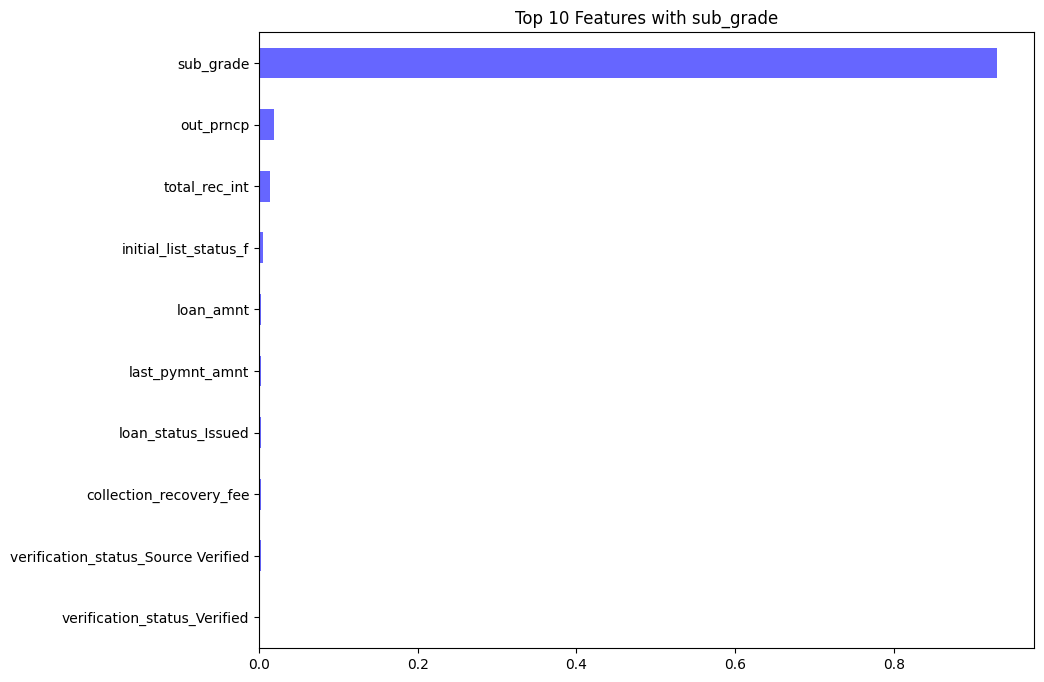

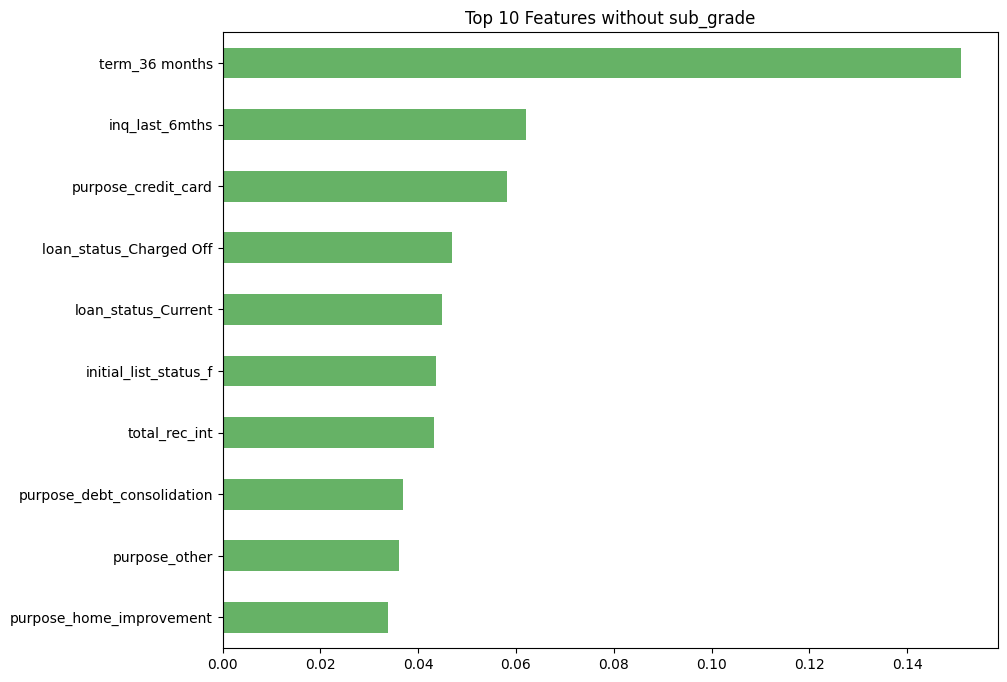

In [20]:
# 1. Create a copy of the dataset without `sub_grade`
X_train_without_sub_grade = X_train.drop(columns=['sub_grade'])
X_test_without_sub_grade = X_test.drop(columns=['sub_grade'])

# 2. Train the model with `sub_grade`
xgb_with_sub_grade = xgb.XGBRegressor(random_state=42)
xgb_with_sub_grade.fit(X_train, y_train)

# 3. Train the model without `sub_grade`
xgb_without_sub_grade = xgb.XGBRegressor(random_state=42)
xgb_without_sub_grade.fit(X_train_without_sub_grade, y_train)

# 4. Predict and calculate metrics for the model with `sub_grade`
y_train_pred_with = xgb_with_sub_grade.predict(X_train)
y_test_pred_with = xgb_with_sub_grade.predict(X_test)

train_rmse_with = np.sqrt(mean_squared_error(y_train, y_train_pred_with))
test_rmse_with = np.sqrt(mean_squared_error(y_test, y_test_pred_with))
train_r2_with = r2_score(y_train, y_train_pred_with)
test_r2_with = r2_score(y_test, y_test_pred_with)

# 5. Predict and calculate metrics for the model without `sub_grade`
y_train_pred_without = xgb_without_sub_grade.predict(X_train_without_sub_grade)
y_test_pred_without = xgb_without_sub_grade.predict(X_test_without_sub_grade)

train_rmse_without = np.sqrt(mean_squared_error(y_train, y_train_pred_without))
test_rmse_without = np.sqrt(mean_squared_error(y_test, y_test_pred_without))
train_r2_without = r2_score(y_train, y_train_pred_without)
test_r2_without = r2_score(y_test, y_test_pred_without)

# 6. Print the comparison of performance metrics
print("With sub_grade:")
print(f"Train RMSE: {train_rmse_with}, Train R2: {train_r2_with}")
print(f"Test RMSE: {test_rmse_with}, Test R2: {test_r2_with}")

print("\nWithout sub_grade:")
print(f"Train RMSE: {train_rmse_without}, Train R2: {train_r2_without}")
print(f"Test RMSE: {test_rmse_without}, Test R2: {test_r2_without}")

# 7. (Optional) Plot the Feature Importance for both models
# With sub_grade
xgb_importances_with = xgb_with_sub_grade.feature_importances_
xgb_feature_importance_with = pd.Series(xgb_importances_with, index=X_train.columns)

# Without sub_grade
xgb_importances_without = xgb_without_sub_grade.feature_importances_
xgb_feature_importance_without = pd.Series(xgb_importances_without, index=X_train_without_sub_grade.columns)

# Plot Feature Importance for both models
plt.figure(figsize=(10, 8))
xgb_feature_importance_with.sort_values().tail(10).plot(kind='barh', color='blue', alpha=0.6)
plt.title('Top 10 Features with sub_grade')

plt.figure(figsize=(10, 8))
xgb_feature_importance_without.sort_values().tail(10).plot(kind='barh', color='green', alpha=0.6)
plt.title('Top 10 Features without sub_grade')

plt.show()

Tree Split (Simple XG Boost --> With and Without Sub-Grade)

In [21]:
# 8. Plot a tree from the model with `sub_grade`

from xgboost import plot_tree

# Set up the figure and axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 30))  # Two subplots side by side

# 1st tree with sub_grade
plot_tree(xgb_with_sub_grade, num_trees=0, rankdir='LR', ax=axes[0])
axes[0].set_title('XGBoost Tree with sub_grade', fontsize=16)

# 2nd tree without sub_grade
plot_tree(xgb_without_sub_grade, num_trees=0, rankdir='LR', ax=axes[1])
axes[1].set_title('XGBoost Tree without sub_grade', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
display(X_train[numerical_cols].describe())

,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc
count,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05
mean,2.523268e-17,4.449957e-16,-9.571066e-16,-7.566522e-16,1.955767e-16,-4.095386e-16,1.378886e-16,-4.609772e-17,4.256256e-18,4.980875e-17,7.926252e-18,1.880726e-17,-2.110540e-17,-1.997978e-17,-1.653491e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.675105e+00,-1.742750e+00,-1.930431e+00,-2.242425e+00,-2.367863e+00,-1.076719e+00,-8.479672e-01,-4.427968e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-2.193977e+00
25%,-7.773707e-01,-7.232971e-01,-7.204962e-01,-7.503525e-01,-7.325055e-01,-9.480732e-01,-6.347185e-01,-3.835978e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-7.000614e-01
50%,-1.669114e-01,-2.201218e-01,-2.140119e-01,-5.760461e-02,3.179969e-02,-1.781871e-01,-3.255272e-01,-3.468853e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-1.398429e-01
75%,5.991552e-01,5.623643e-01,4.894386e-01,7.090202e-01,7.704858e-01,6.174214e-01,2.418165e-01,-2.788748e-01,-8.094931e-02,-3.730718e-01,3.486455e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,4.203757e-01
max,2.394624e+00,4.172898e+00,4.175519e+00,2.600755e+00,3.573211e+01,3.064244e+00,1.004566e+01,7.167943e+00,1.072885e+02,4.387108e+01,7.682158e+00,1.453868e+02,1.442965e+02,1.728115e+02,1.461258e+01


Multiple Linear Regression (MLR)

In [23]:
# Multiple Linear Regression

# Create a Linear Regression Model
mlr_model_1 = LinearRegression()
mlr_model_1.fit(X_train,y_train)

# Predict the values using the model on the train and test data
y_train_pred = mlr_model_1.predict(X_train)
y_test_pred = mlr_model_1.predict(X_test)

# Estimate the RMSE and R2 for the train and test set
mlr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
mlr_train_r2 = r2_score(y_train, y_train_pred)

mlr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mlr_test_r2 = r2_score(y_test, y_test_pred)

# Print the results from the training and test data
print("Train RMSE:", mlr_train_rmse)
print("Train R2:", mlr_train_r2)

print("Test RMSE:", mlr_test_rmse)
print("Test R2:", mlr_test_r2)

Train RMSE: 0.6118507246080167
Train R2: 0.9807132290606015
Test RMSE: 0.6141009000246841
Test R2: 0.9805738086127215


Multiple Linear Regression (Magnitude and Importance Plots)

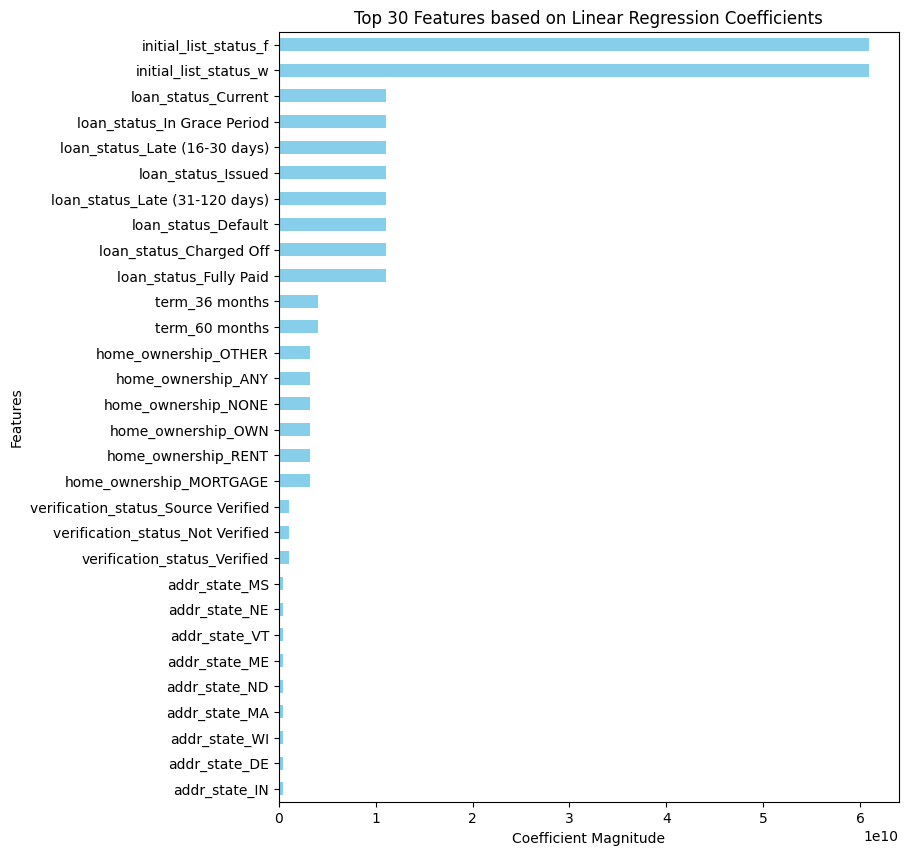

<Figure size 640x480 with 0 Axes>

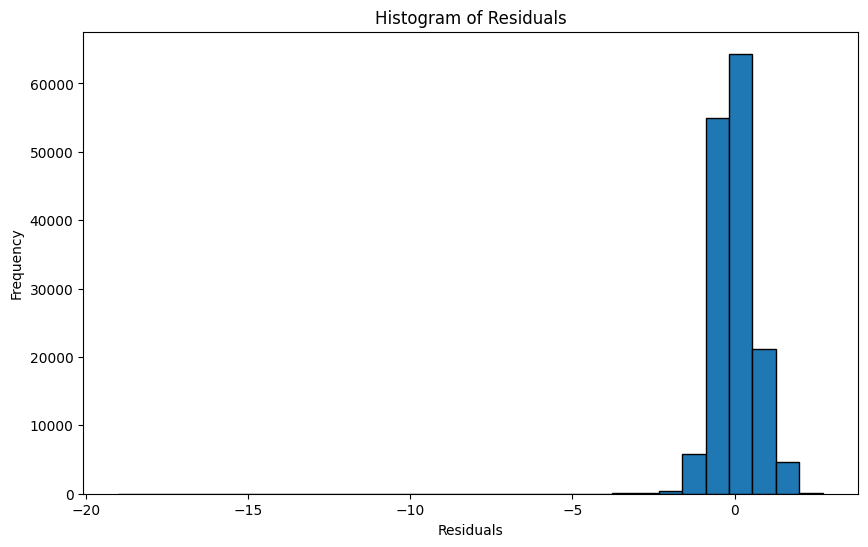

In [24]:
# Evaluate the coefficients from the Multiple Linear Regression Model
mlr_coefficients = pd.Series(mlr_model_1.coef_,index = X.columns)

top_30_mlr_features = mlr_coefficients.abs().sort_values(ascending=False).head(30)

# Plot the coefficients from the model
plt.figure(figsize = (8,10))
top_30_mlr_features.sort_values().plot(kind = 'barh',color = 'skyblue')
plt.title('Top 30 Features based on Linear Regression Coefficients')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()
plt.clf()

# Estimate the Residuals for Multiple Linear Regression
residuals = y_test - y_test_pred

# Histogram of Residuals
plt.figure(figsize = (10,6))
plt.hist(residuals,bins = 30,edgecolor = 'k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [25]:
# Inspect the variables after scaling
display(pd.DataFrame(X_train,columns = numerical_cols).describe())

,loan_amnt,installment,annual_inc,dti,revol_util,out_prncp,total_rec_int,last_pymnt_amnt,collection_recovery_fee,delinq_2yrs,inq_last_6mths,pub_rec,collections_12_mths_ex_med,acc_now_delinq,open_acc
count,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05,6.059950e+05
mean,2.523268e-17,4.449957e-16,-9.571066e-16,-7.566522e-16,1.955767e-16,-4.095386e-16,1.378886e-16,-4.609772e-17,4.256256e-18,4.980875e-17,7.926252e-18,1.880726e-17,-2.110540e-17,-1.997978e-17,-1.653491e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.675105e+00,-1.742750e+00,-1.930431e+00,-2.242425e+00,-2.367863e+00,-1.076719e+00,-8.479672e-01,-4.427968e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-2.193977e+00
25%,-7.773707e-01,-7.232971e-01,-7.204962e-01,-7.503525e-01,-7.325055e-01,-9.480732e-01,-6.347185e-01,-3.835978e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-7.000614e-01
50%,-1.669114e-01,-2.201218e-01,-2.140119e-01,-5.760461e-02,3.179969e-02,-1.781871e-01,-3.255272e-01,-3.468853e-01,-8.094931e-02,-3.730718e-01,-6.989991e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,-1.398429e-01
75%,5.991552e-01,5.623643e-01,4.894386e-01,7.090202e-01,7.704858e-01,6.174214e-01,2.418165e-01,-2.788748e-01,-8.094931e-02,-3.730718e-01,3.486455e-01,-3.394546e-01,-1.117982e-01,-6.704091e-02,4.203757e-01
max,2.394624e+00,4.172898e+00,4.175519e+00,2.600755e+00,3.573211e+01,3.064244e+00,1.004566e+01,7.167943e+00,1.072885e+02,4.387108e+01,7.682158e+00,1.453868e+02,1.442965e+02,1.728115e+02,1.461258e+01


Decision Trees (DT)

In [26]:
# Decision Tree

# Create the Decision Tree Model
dt_model_1 = DecisionTreeRegressor(random_state = 42)
dt_model_1.fit(X_train,y_train)

# Predict the values using the model on the train and test data
y_train_pred = dt_model_1.predict(X_train)
y_test_pred = dt_model_1.predict(X_test)

# Estimate the RMSE and R2 for the train and test set
dt_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
dt_train_r2 = r2_score(y_train, y_train_pred)

dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
dt_test_r2 = r2_score(y_test, y_test_pred)

# Print the results from the training and test data
print("Train RMSE:", dt_train_rmse)
print("Train R2:", dt_train_r2)

print("Test RMSE:", dt_test_rmse)
print("Test R2:", dt_test_r2)

Train RMSE: 1.5478721884526943e-13
Train R2: 1.0
Test RMSE: 0.4181728342015459
Test R2: 0.9909921773313614


Decision Trees (Feature Importance Plots)

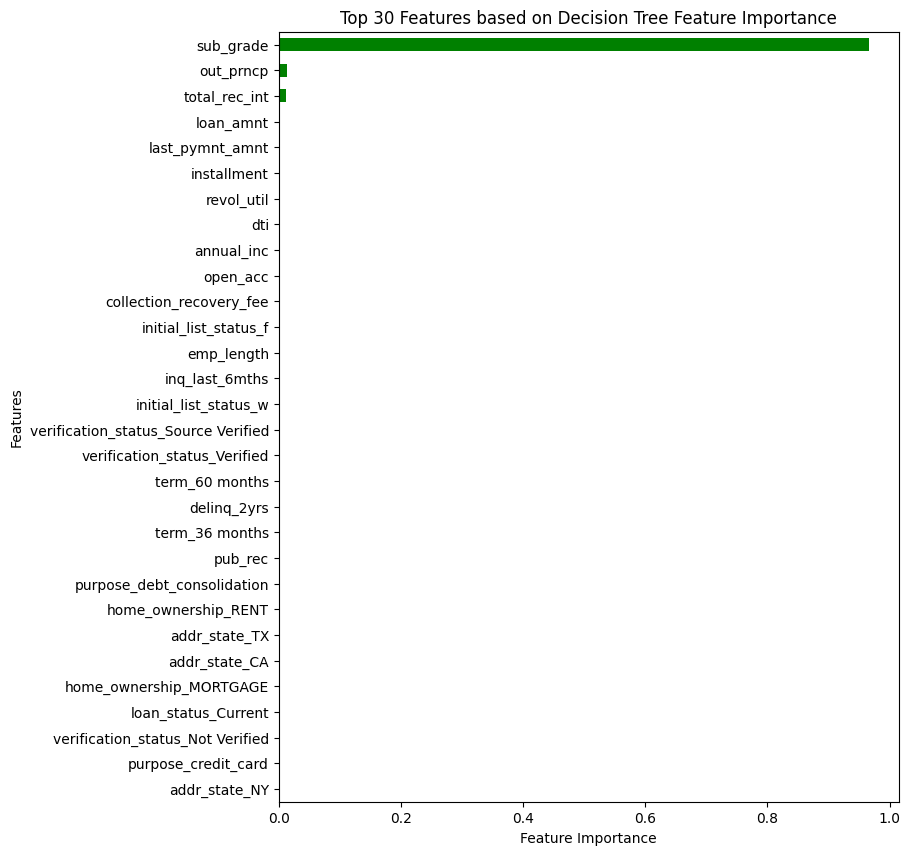

<Figure size 640x480 with 0 Axes>

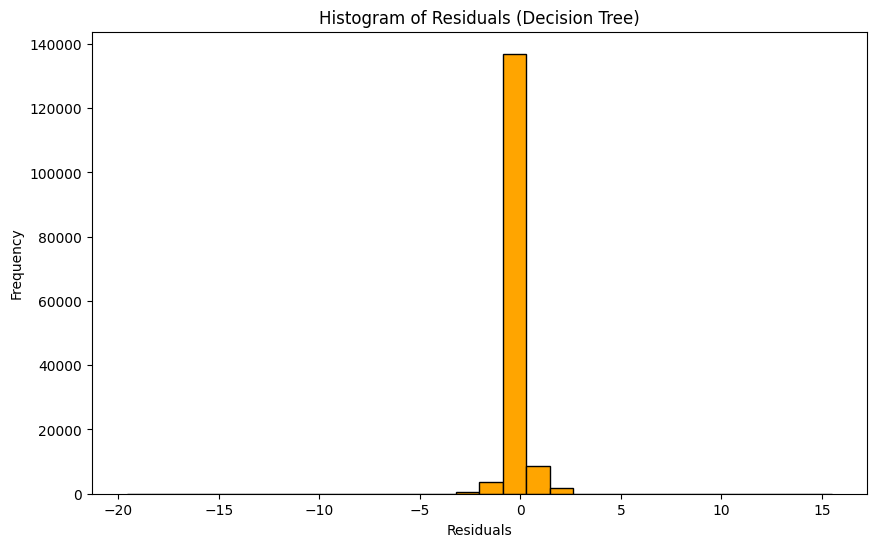

In [27]:
# Extract Feature Importance
dt_feature_importances = pd.Series(dt_model_1.feature_importances_,index = X.columns)

# Sort the Top 30 Feature Importance
top_30_dt_features = dt_feature_importances.sort_values(ascending=False).head(30)

# Plot the Top 30 Features
plt.figure(figsize = (8,10))
top_30_dt_features.sort_values().plot(kind = 'barh',color = 'green')
plt.title('Top 30 Features based on Decision Tree Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
plt.clf()

# Estimate the Residuals for Decision Tree
residuals = y_test - y_test_pred
plt.figure(figsize = (10,6))
plt.hist(residuals, bins=30,color = 'orange',edgecolor = 'black')
plt.title('Histogram of Residuals (Decision Tree)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Decision Trees (With and Without Sub-Grade)

With sub_grade:
Train RMSE: 1.5478721884526943e-13, Train R2: 1.0
Test RMSE: 0.4181728342015459, Test R2: 0.9909921773313614

Without sub_grade:
Train RMSE: 4.073273349798956e-15, Train R2: 1.0
Test RMSE: 1.8514388826382557, Test R2: 0.8234259185033183


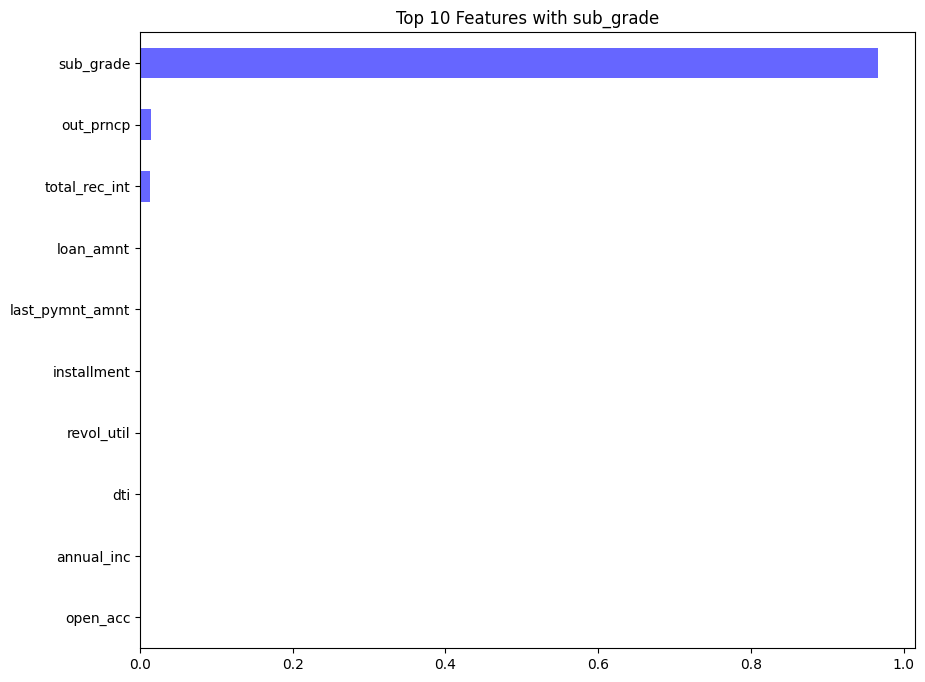

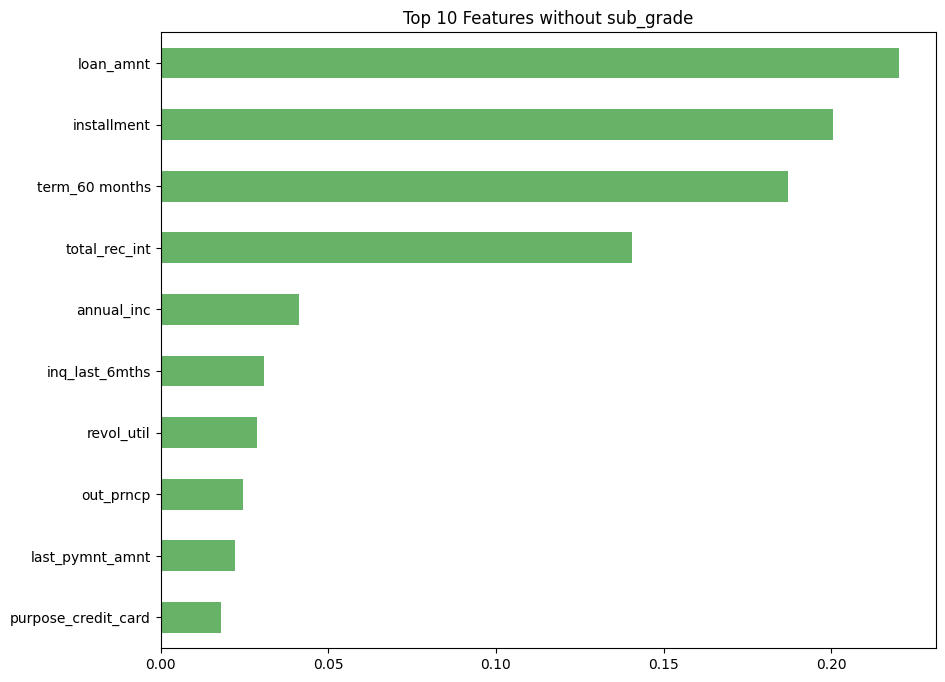

In [28]:
# 1. Create a copy of the dataset without `sub_grade`
X_train_without_sub_grade = X_train.drop(columns=['sub_grade'])
X_test_without_sub_grade = X_test.drop(columns=['sub_grade'])

# 2. Train the Decision Tree model with `sub_grade`
dt_with_sub_grade = DecisionTreeRegressor(random_state=42)
dt_with_sub_grade.fit(X_train, y_train)

# 3. Train the Decision Tree model without `sub_grade`
dt_without_sub_grade = DecisionTreeRegressor(random_state=42)
dt_without_sub_grade.fit(X_train_without_sub_grade, y_train)

# 4. Predict and calculate metrics for the model with `sub_grade`
y_train_pred_with = dt_with_sub_grade.predict(X_train)
y_test_pred_with = dt_with_sub_grade.predict(X_test)

train_rmse_with = np.sqrt(mean_squared_error(y_train, y_train_pred_with))
test_rmse_with = np.sqrt(mean_squared_error(y_test, y_test_pred_with))
train_r2_with = r2_score(y_train, y_train_pred_with)
test_r2_with = r2_score(y_test, y_test_pred_with)

# 5. Predict and calculate metrics for the model without `sub_grade`
y_train_pred_without = dt_without_sub_grade.predict(X_train_without_sub_grade)
y_test_pred_without = dt_without_sub_grade.predict(X_test_without_sub_grade)

train_rmse_without = np.sqrt(mean_squared_error(y_train, y_train_pred_without))
test_rmse_without = np.sqrt(mean_squared_error(y_test, y_test_pred_without))
train_r2_without = r2_score(y_train, y_train_pred_without)
test_r2_without = r2_score(y_test, y_test_pred_without)

# 6. Print the comparison of performance metrics
print("With sub_grade:")
print(f"Train RMSE: {train_rmse_with}, Train R2: {train_r2_with}")
print(f"Test RMSE: {test_rmse_with}, Test R2: {test_r2_with}")

print("\nWithout sub_grade:")
print(f"Train RMSE: {train_rmse_without}, Train R2: {train_r2_without}")
print(f"Test RMSE: {test_rmse_without}, Test R2: {test_r2_without}")

# 7. (Optional) Plot the Feature Importance for both models
# With sub_grade
dt_importances_with = dt_with_sub_grade.feature_importances_
dt_feature_importance_with = pd.Series(dt_importances_with, index=X_train.columns)

# Without sub_grade
dt_importances_without = dt_without_sub_grade.feature_importances_
dt_feature_importance_without = pd.Series(dt_importances_without, index=X_train_without_sub_grade.columns)

# Plot Feature Importance for the model with sub_grade
plt.figure(figsize=(10, 8))
dt_feature_importance_with.sort_values().tail(10).plot(kind='barh', color='blue', alpha=0.6)
plt.title('Top 10 Features with sub_grade')

# Plot Feature Importance for the model without sub_grade
plt.figure(figsize=(10, 8))
dt_feature_importance_without.sort_values().tail(10).plot(kind='barh', color='green', alpha=0.6)
plt.title('Top 10 Features without sub_grade')

plt.show()

Create the Decision Tree Model with Regularization (Pruning)

With sub_grade:
Train RMSE: 0.6105232881659187, Train R2: 0.9807968252362298
Test RMSE: 0.6150547434366944, Test R2: 0.9805134148401372

Without sub_grade:
Train RMSE: 3.2405164394909582, Train R2: 0.459000301325316
Test RMSE: 3.2501424713227696, Test R2: 0.4558570671415645


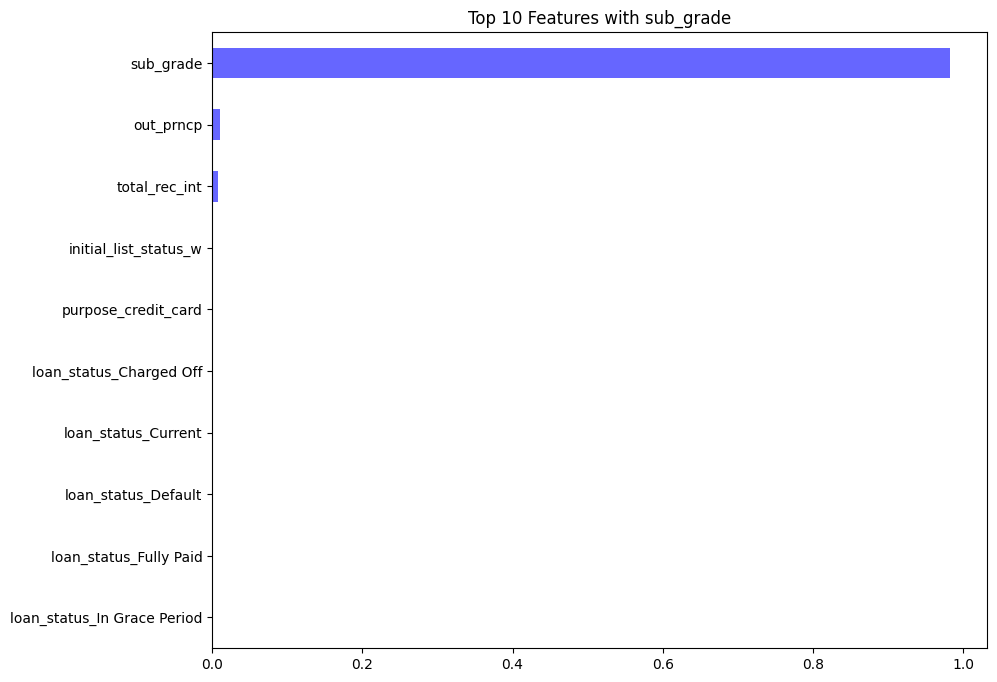

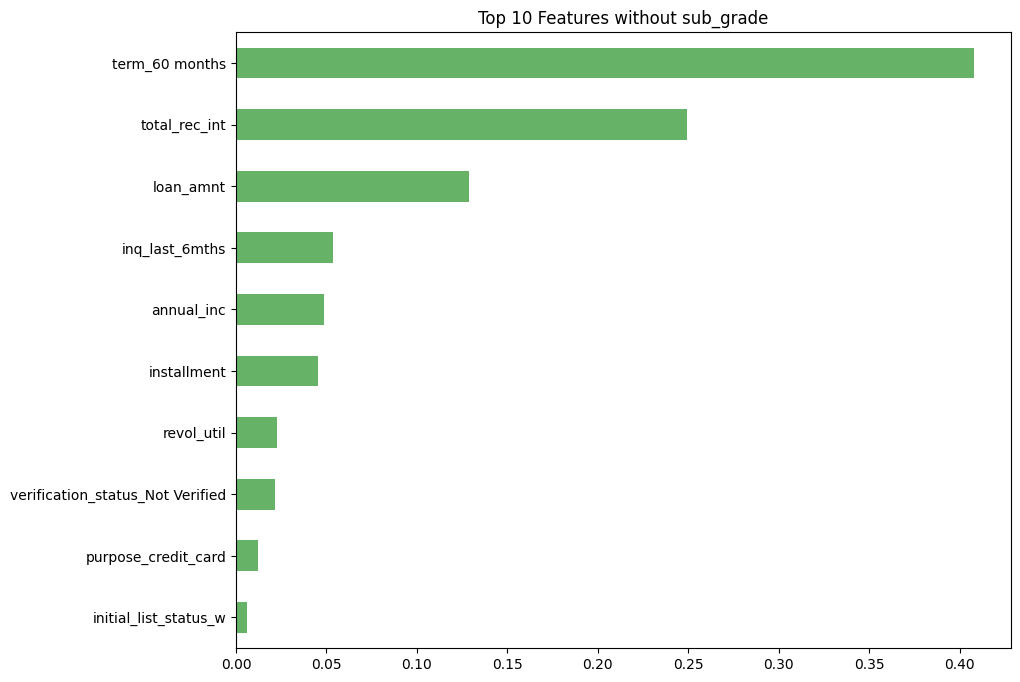

In [29]:
# Create the Decision Tree Model with Regularization (Pruning)
# Here, max_depth, min_samples_split, and min_samples_leaf are regularization parameters
dt_model_with_sub_grade = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=10)
dt_model_without_sub_grade = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=20, min_samples_leaf=10)

# 1. Train the model with sub_grade
dt_model_with_sub_grade.fit(X_train, y_train)

# 2. Train the model without sub_grade
X_train_without_sub_grade = X_train.drop(columns=['sub_grade'])
X_test_without_sub_grade = X_test.drop(columns=['sub_grade'])
dt_model_without_sub_grade.fit(X_train_without_sub_grade, y_train)

# 3. Predict and calculate metrics for the model with sub_grade
y_train_pred_with = dt_model_with_sub_grade.predict(X_train)
y_test_pred_with = dt_model_with_sub_grade.predict(X_test)

train_rmse_with = np.sqrt(mean_squared_error(y_train, y_train_pred_with))
test_rmse_with = np.sqrt(mean_squared_error(y_test, y_test_pred_with))
train_r2_with = r2_score(y_train, y_train_pred_with)
test_r2_with = r2_score(y_test, y_test_pred_with)

# 4. Predict and calculate metrics for the model without sub_grade
y_train_pred_without = dt_model_without_sub_grade.predict(X_train_without_sub_grade)
y_test_pred_without = dt_model_without_sub_grade.predict(X_test_without_sub_grade)

train_rmse_without = np.sqrt(mean_squared_error(y_train, y_train_pred_without))
test_rmse_without = np.sqrt(mean_squared_error(y_test, y_test_pred_without))
train_r2_without = r2_score(y_train, y_train_pred_without)
test_r2_without = r2_score(y_test, y_test_pred_without)

# 5. Print the comparison of performance metrics
print("With sub_grade:")
print(f"Train RMSE: {train_rmse_with}, Train R2: {train_r2_with}")
print(f"Test RMSE: {test_rmse_with}, Test R2: {test_r2_with}")

print("\nWithout sub_grade:")
print(f"Train RMSE: {train_rmse_without}, Train R2: {train_r2_without}")
print(f"Test RMSE: {test_rmse_without}, Test R2: {test_r2_without}")

# 6. Plot Feature Importance for both models
# With sub_grade
dt_importances_with = dt_model_with_sub_grade.feature_importances_
dt_feature_importance_with = pd.Series(dt_importances_with, index=X_train.columns)

# Without sub_grade
dt_importances_without = dt_model_without_sub_grade.feature_importances_
dt_feature_importance_without = pd.Series(dt_importances_without, index=X_train_without_sub_grade.columns)

# Plot Feature Importance for both models
plt.figure(figsize=(10, 8))
dt_feature_importance_with.sort_values().tail(10).plot(kind='barh', color='blue', alpha=0.6)
plt.title('Top 10 Features with sub_grade')

plt.figure(figsize=(10, 8))
dt_feature_importance_without.sort_values().tail(10).plot(kind='barh', color='green', alpha=0.6)
plt.title('Top 10 Features without sub_grade')

plt.show()

Random Forest (RF)

In [30]:
# Random Forest

# Create the Random Forest Model
rf_model_1 = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_model_1.fit(X_train, y_train)

# Predict the values using the model on the train and test data
y_train_pred = rf_model_1.predict(X_train)
y_test_pred = rf_model_1.predict(X_test)

# Estimate the RMSE and R2 for the train and test set
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
rf_train_r2 = r2_score(y_train, y_train_pred)

rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rf_test_r2 = r2_score(y_test, y_test_pred)

# Print the results from the training and test data
print("Train RMSE:", rf_train_rmse)
print("Train R2:", rf_train_r2)

print("Test RMSE:", rf_test_rmse)
print("Test R2:", rf_test_r2)

Train RMSE: 1.7609916710619753
Train R2: 0.840234438909272
Test RMSE: 1.7762061365301949
Test R2: 0.8374844478791446


Random Forest (Feature Importance Plots)

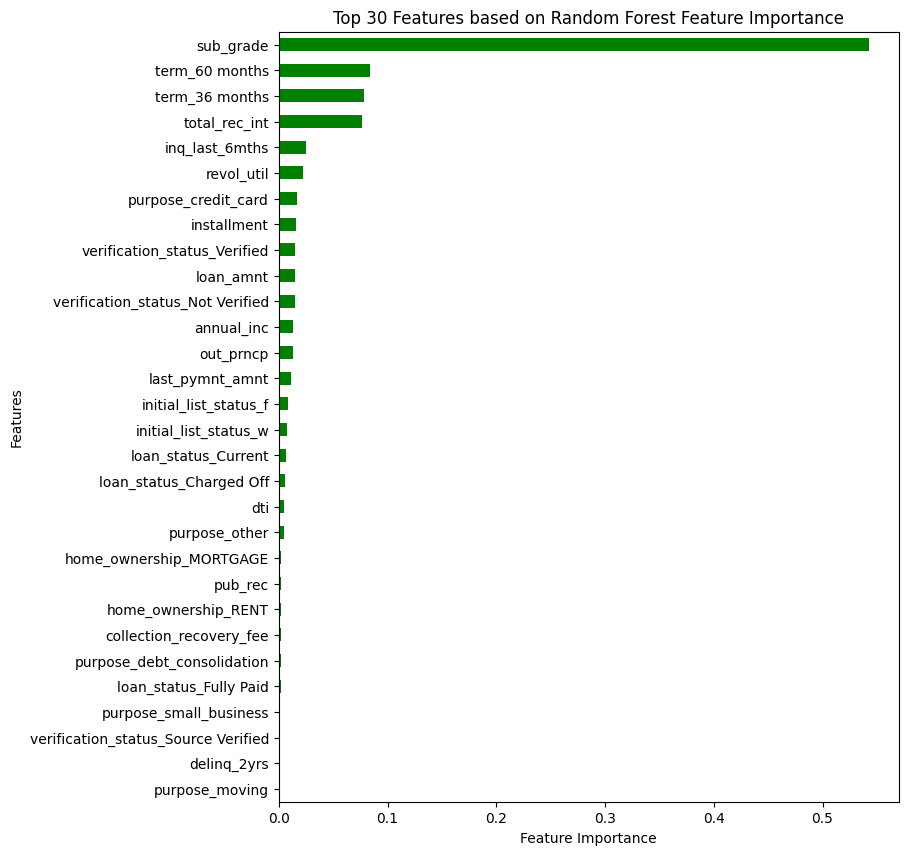

<Figure size 640x480 with 0 Axes>

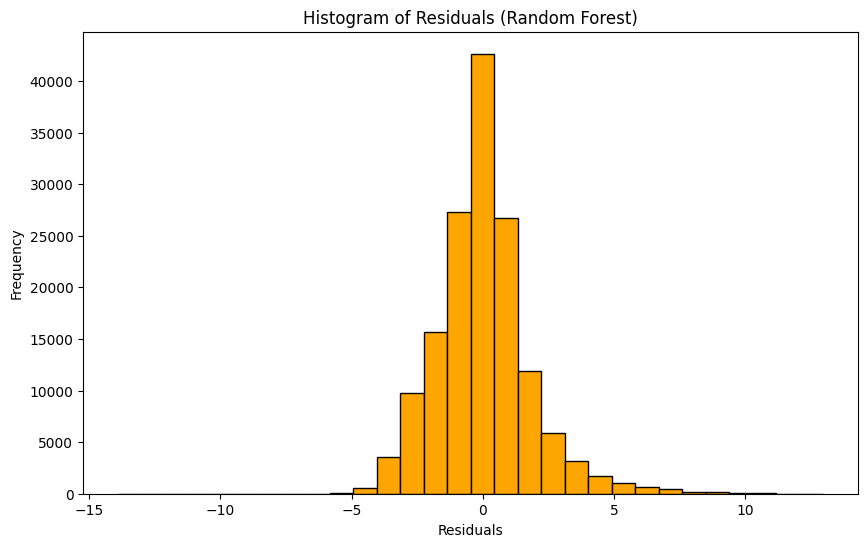

In [31]:
# Extract Feature Importance
rf_feature_importances = pd.Series(rf_model_1.feature_importances_, index=X.columns)

# Sort the Top 30 Feature Importance
top_30_rf_features = rf_feature_importances.sort_values(ascending=False).head(30)

# Plot the Top 30 Features
plt.figure(figsize=(8, 10))
top_30_rf_features.sort_values().plot(kind='barh', color='green')
plt.title('Top 30 Features based on Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()
plt.clf()

# Estimate the Residuals for Random Forest
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Random Forest (With and Without Sub-Grade)

With sub_grade:
Train RMSE: 1.7609916710619753, Train R2: 0.840234438909272
Test RMSE: 1.7762061365301949, Test R2: 0.8374844478791446

Without sub_grade:
Train RMSE: 3.066680568094044, Train R2: 0.5154867616197585
Test RMSE: 3.089389086907557, Test R2: 0.508352979565344


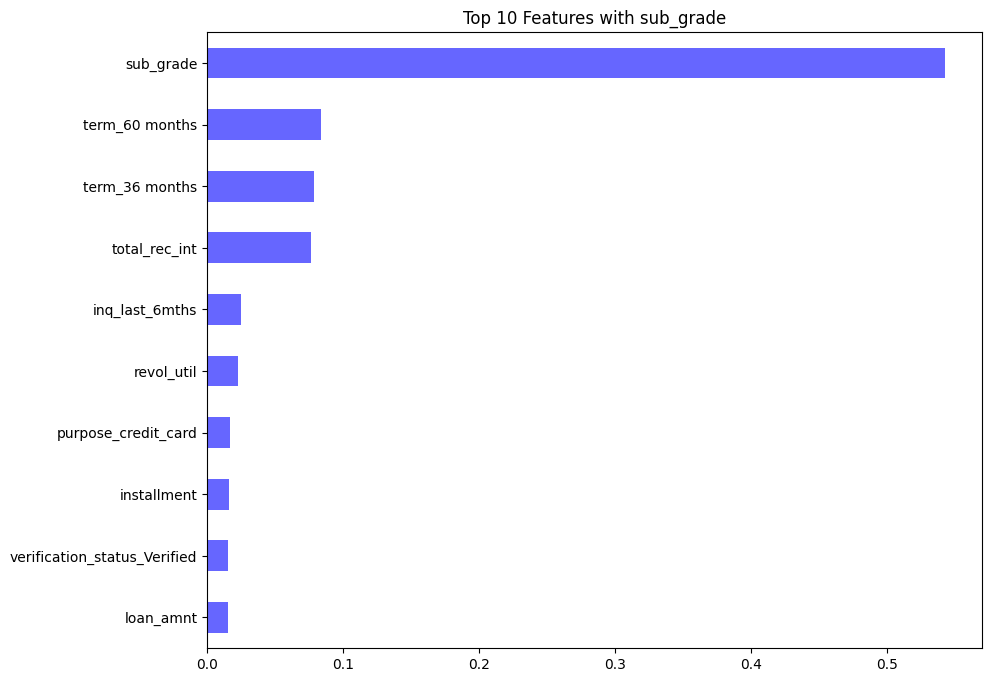

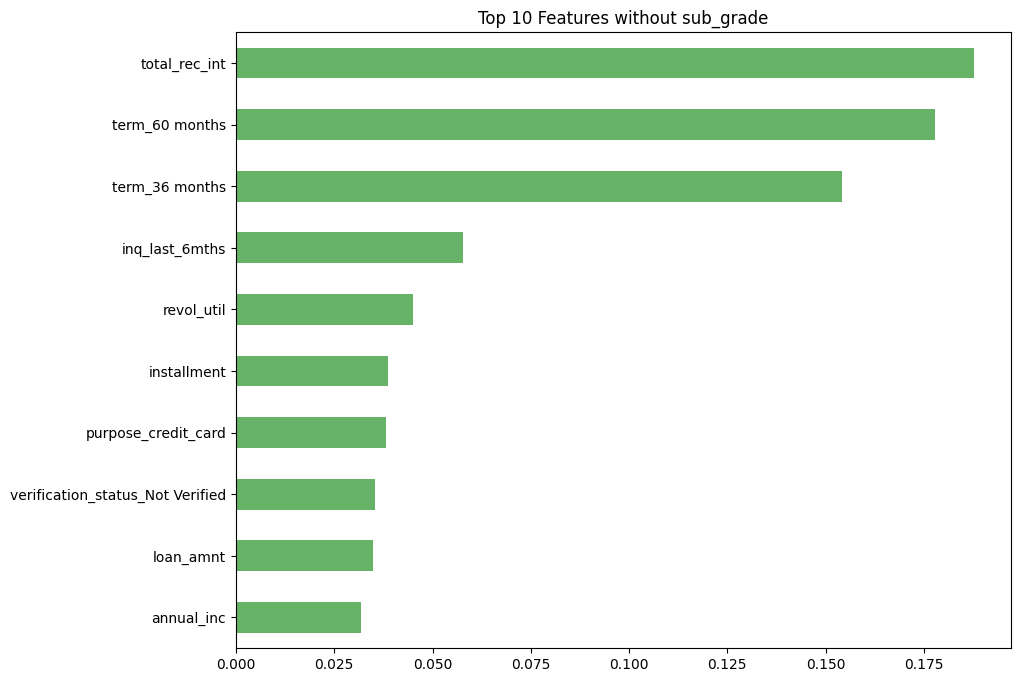

In [32]:
# 1. Create a copy of the dataset without `sub_grade`
X_train_without_sub_grade = X_train.drop(columns=['sub_grade'])
X_test_without_sub_grade = X_test.drop(columns=['sub_grade'])

# 2. Train the Random Forest model with `sub_grade`
rf_with_sub_grade = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_with_sub_grade.fit(X_train, y_train)

# 3. Train the Random Forest model without `sub_grade`
rf_without_sub_grade = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_without_sub_grade.fit(X_train_without_sub_grade, y_train)

# 4. Predict and calculate metrics for the model with `sub_grade`
y_train_pred_with = rf_with_sub_grade.predict(X_train)
y_test_pred_with = rf_with_sub_grade.predict(X_test)

train_rmse_with = np.sqrt(mean_squared_error(y_train, y_train_pred_with))
test_rmse_with = np.sqrt(mean_squared_error(y_test, y_test_pred_with))
train_r2_with = r2_score(y_train, y_train_pred_with)
test_r2_with = r2_score(y_test, y_test_pred_with)

# 5. Predict and calculate metrics for the model without `sub_grade`
y_train_pred_without = rf_without_sub_grade.predict(X_train_without_sub_grade)
y_test_pred_without = rf_without_sub_grade.predict(X_test_without_sub_grade)

train_rmse_without = np.sqrt(mean_squared_error(y_train, y_train_pred_without))
test_rmse_without = np.sqrt(mean_squared_error(y_test, y_test_pred_without))
train_r2_without = r2_score(y_train, y_train_pred_without)
test_r2_without = r2_score(y_test, y_test_pred_without)

# 6. Print the comparison of performance metrics
print("With sub_grade:")
print(f"Train RMSE: {train_rmse_with}, Train R2: {train_r2_with}")
print(f"Test RMSE: {test_rmse_with}, Test R2: {test_r2_with}")

print("\nWithout sub_grade:")
print(f"Train RMSE: {train_rmse_without}, Train R2: {train_r2_without}")
print(f"Test RMSE: {test_rmse_without}, Test R2: {test_r2_without}")

# 7. (Optional) Plot the Feature Importance for both models
# With sub_grade
rf_importances_with = rf_with_sub_grade.feature_importances_
rf_feature_importance_with = pd.Series(rf_importances_with, index=X_train.columns)

# Without sub_grade
rf_importances_without = rf_without_sub_grade.feature_importances_
rf_feature_importance_without = pd.Series(rf_importances_without, index=X_train_without_sub_grade.columns)

# Plot Feature Importance for both models
plt.figure(figsize=(10, 8))
rf_feature_importance_with.sort_values().tail(10).plot(kind='barh', color='blue', alpha=0.6)
plt.title('Top 10 Features with sub_grade')

plt.figure(figsize=(10, 8))
rf_feature_importance_without.sort_values().tail(10).plot(kind='barh', color='green', alpha=0.6)
plt.title('Top 10 Features without sub_grade')

plt.show()

In [33]:
!pip install tensorflow

Neural Networks (NN)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 1.3308 - val_loss: 0.1609
Epoch 2/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.1532 - val_loss: 0.1332
Epoch 3/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.1210 - val_loss: 0.1124
Epoch 4/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.1039 - val_loss: 0.0955
Epoch 5/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.0897 - val_loss: 0.0944
Epoch 6/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0798 - val_loss: 0.0789
Epoch 7/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0708 - val_loss: 0.0742
Epoch 8/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0641 - val_loss: 0.0695
Epoch 9/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0580 - val_loss: 0.0567
Epoch 10/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 0.0538 - val_loss: 0.0519
Epoch 11/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.0515 - val_loss: 0.05

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           6,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,309 (102.77 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,540 (68.52 KB)

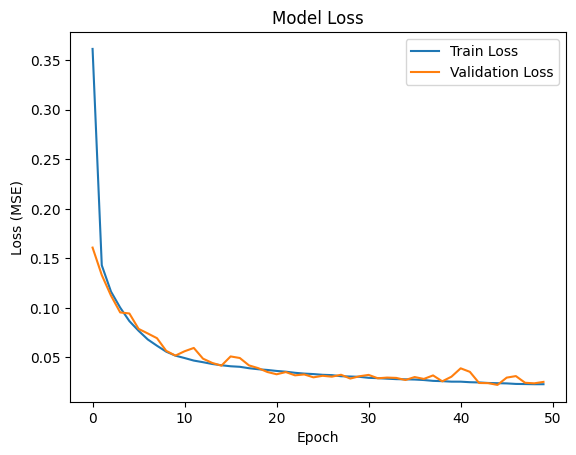

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

tf.random.set_seed(42)
# Define the neural network model
model = Sequential()

# Input layer and first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer (single neuron since this is a regression task)
model.add(Dense(1))

# Compile the model (using Mean Squared Error loss and Adam optimizer)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and R^2 for train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

model.summary()

# Plot the loss during training
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [35]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.2 MB/s eta 0:00:00


In [36]:
print(X_train.dtypes)
print(X_test.dtypes)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

loan_amnt                float64
installment              float64
annual_inc               float64
dti                      float64
revol_util               float64
                          ...   
addr_state_WI               bool
addr_state_WV               bool
addr_state_WY               bool
initial_list_status_f       bool
initial_list_status_w       bool
Length: 103, dtype: object
loan_amnt                float64
installment              float64
annual_inc               float64
dti                      float64
revol_util               float64
                          ...   
addr_state_WI               bool
addr_state_WV               bool
addr_state_WY               bool
initial_list_status_f       bool
initial_list_status_w       bool
Length: 103, dtype: object
Shape of X_train: (605995, 103)
Shape of X_test: (151499, 103)


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


Shape of SHAP values: (100, 103)
Shape of X_test_sample_df: (100, 103)


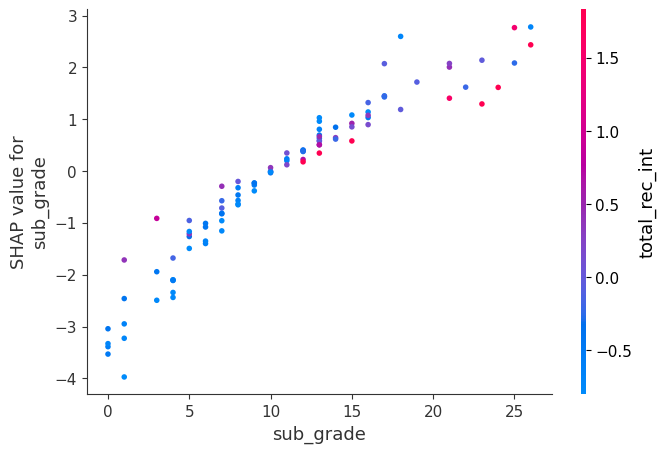

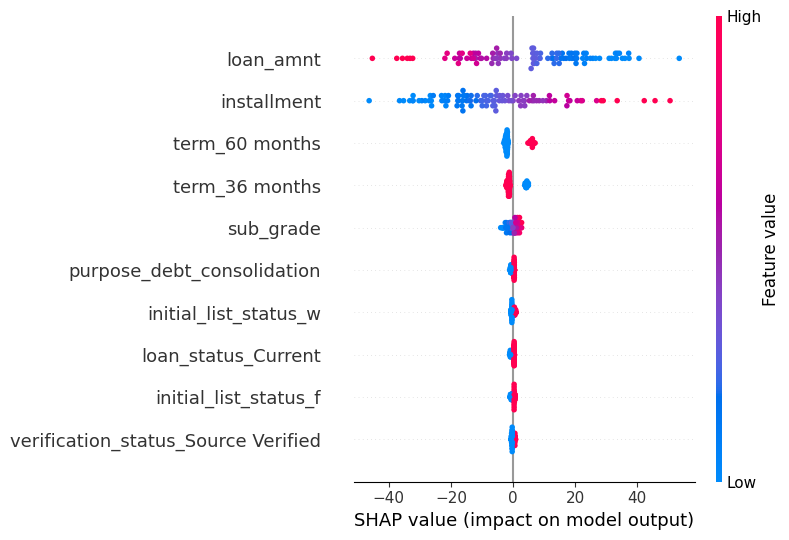

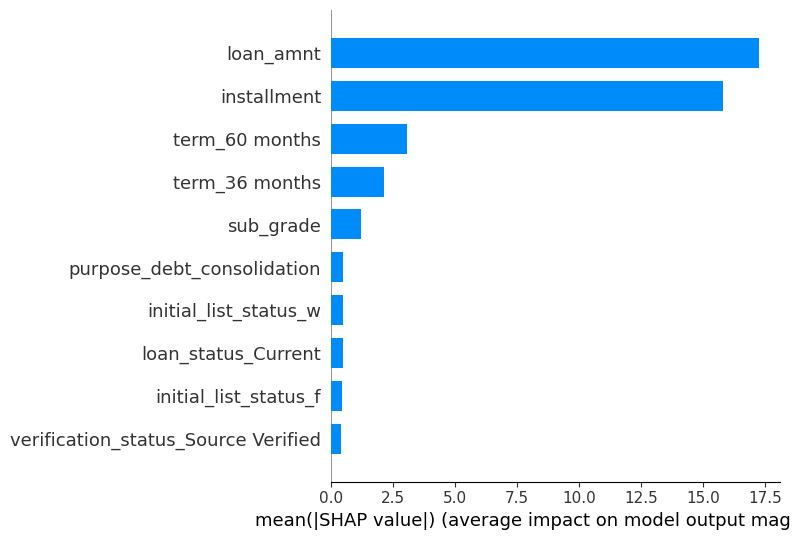

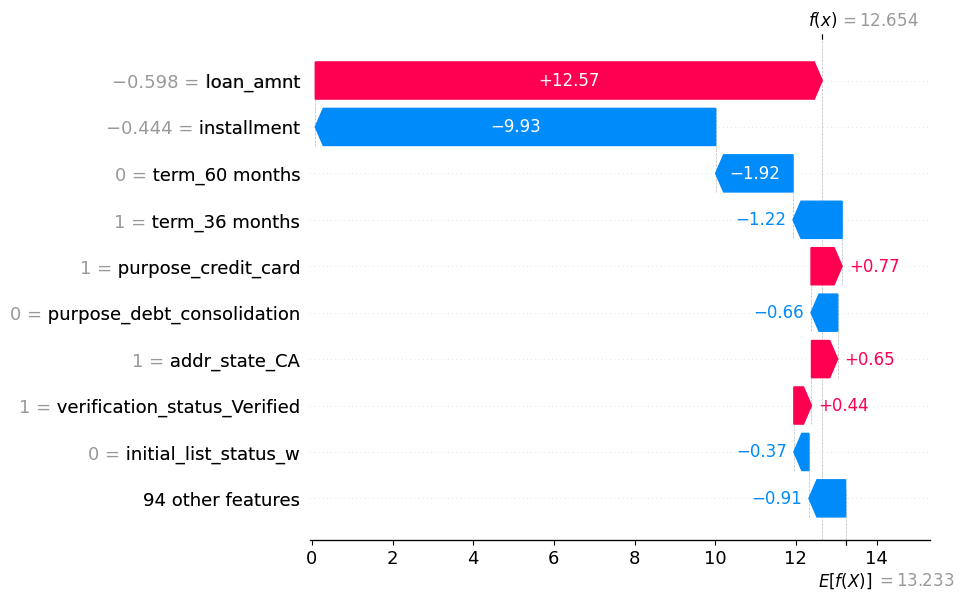

In [37]:
import shap

# Convert boolean columns to float for SHAP compatibility
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Set the background sample size to 100
X_train_background = X_train.sample(100, random_state=42)  # Randomly select 100 samples for background

# Use only 100 samples for the test data as well
X_test_sample = np.array(X_test[:100], dtype=np.float32)

# Create the DeepExplainer for the neural network model with the background sample
explainer = shap.DeepExplainer(model, X_train_background)

# Compute SHAP values for the test set (sample size of 100)
shap_values = explainer.shap_values(X_test_sample)

# Handle SHAP values for single-output models and squeeze the extra dimension
if isinstance(shap_values, list):
    shap_values_corrected = shap_values[0].squeeze()  # Squeeze to remove extra dimension
else:
    shap_values_corrected = shap_values.squeeze()

# Convert X_test_sample to DataFrame for plotting
X_test_sample_df = pd.DataFrame(X_test_sample, columns=X_test.columns)

# Check the shapes of SHAP values and test data to confirm consistency
print("Shape of SHAP values:", shap_values_corrected.shape)
print("Shape of X_test_sample_df:", X_test_sample_df.shape)

# Plot the dependence plot for 'sub_grade'
if 'sub_grade' in X_test_sample_df.columns:
    shap.dependence_plot('sub_grade', shap_values_corrected, X_test_sample_df)
else:
    print("The feature 'sub_grade' is not in the dataset.")

# SHAP Summary Plot showing the top 10 important features
shap.summary_plot(shap_values_corrected, X_test_sample, feature_names=X_test.columns, max_display=10)

# SHAP Summary Plot with bar chart for the top 10 features
shap.summary_plot(shap_values_corrected, X_test_sample, feature_names=X_test.columns, max_display=10, plot_type='bar')

# Waterfall Plot for a specific instance (first test instance in this case)
instance_index = 0
instance_shap_values = shap_values_corrected[instance_index]

# Convert TensorFlow scalar expected_value to a numpy value
expected_value = explainer.expected_value[0].numpy() if isinstance(explainer.expected_value[0], tf.Tensor) else explainer.expected_value[0]

# Plot the waterfall plot for the first test instance
shap.waterfall_plot(
    shap.Explanation(
        values=instance_shap_values,
        base_values=expected_value,  # Convert TensorFlow scalar to numpy value
        data=X_test_sample_df.iloc[instance_index],
        feature_names=X_test.columns
    )
)

Neural Networks (NN) --> 2 --> Dropped Installment Variable

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1.7388 - val_loss: 0.1825
Epoch 2/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.1750 - val_loss: 0.1647
Epoch 3/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.1520 - val_loss: 0.1472
Epoch 4/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.1376 - val_loss: 0.1461
Epoch 5/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.1313 - val_loss: 0.1500
Epoch 6/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.1277 - val_loss: 0.1371
Epoch 7/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.1252 - val_loss: 0.1362
Epoch 8/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.1227 - val_loss: 0.1335
Epoch 9/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.1210 - val_loss: 0.1308
Epoch 10/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.1194 - val_loss: 0.1271
Epoch 11/50
18938/18938 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - loss: 0.1180 - val_loss: 0.12

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           6,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,117 (102.02 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,412 (68.02 KB)

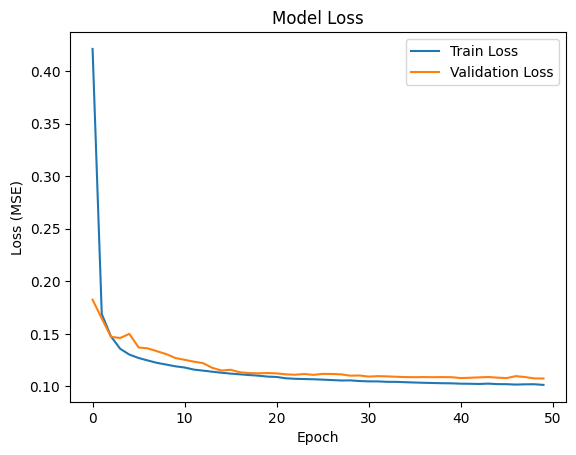

In [38]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

# Make a copy of X_train and X_test without 'installment'
X_train_modified = X_train.drop(columns=['installment'])
X_test_modified = X_test.drop(columns=['installment'])

# Define the neural network model
model = Sequential()

# Input layer and first hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, input_dim=X_train_modified.shape[1], activation='relu'))

# Second hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))

# Output layer (single neuron since this is a regression task)
model.add(Dense(1))

# Compile the model (using Mean Squared Error loss and Adam optimizer)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_modified, y_train, validation_data=(X_test_modified, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions
y_train_pred = model.predict(X_train_modified)
y_test_pred = model.predict(X_test_modified)

# Calculate RMSE and R^2 for train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

# Display the model summary
model.summary()

# Plot the loss during training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Neural Networks (NN) --> Shap Analysis 2

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


Shape of SHAP values: (100, 102)
Shape of X_test_sample_df: (100, 102)


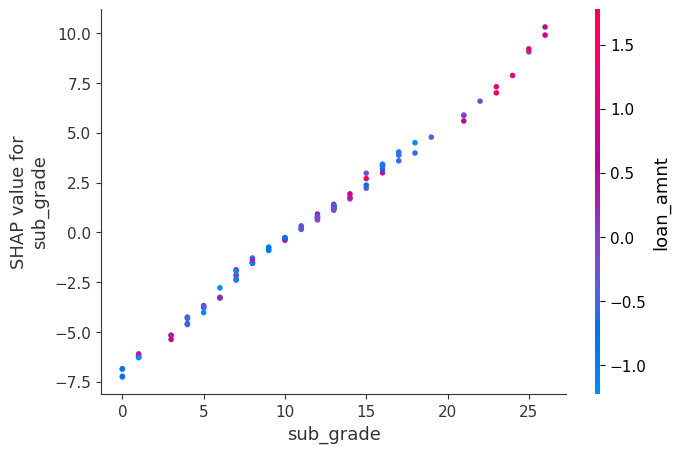

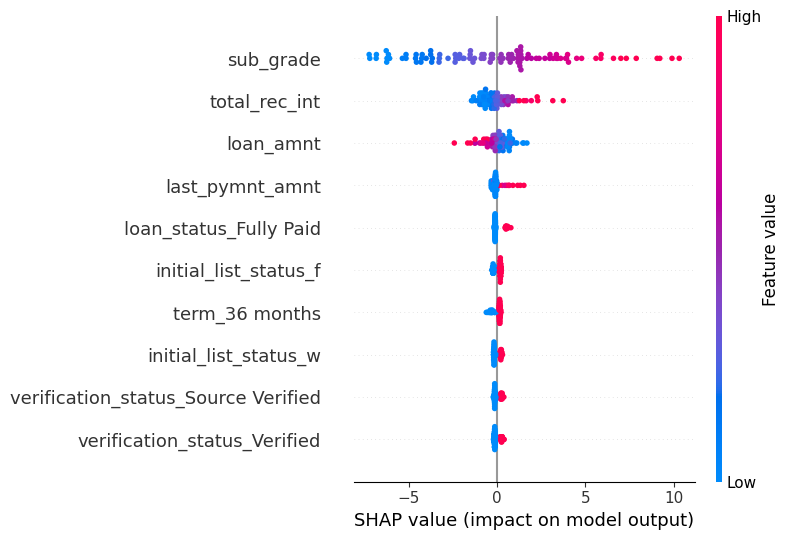

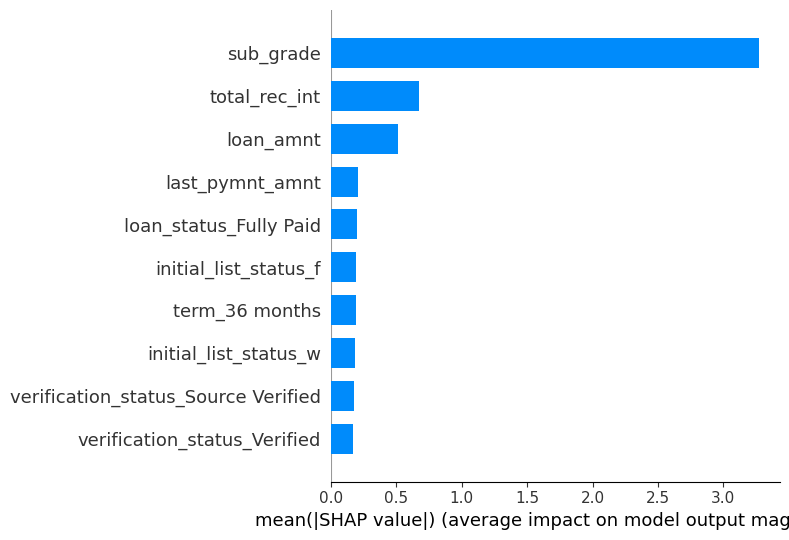

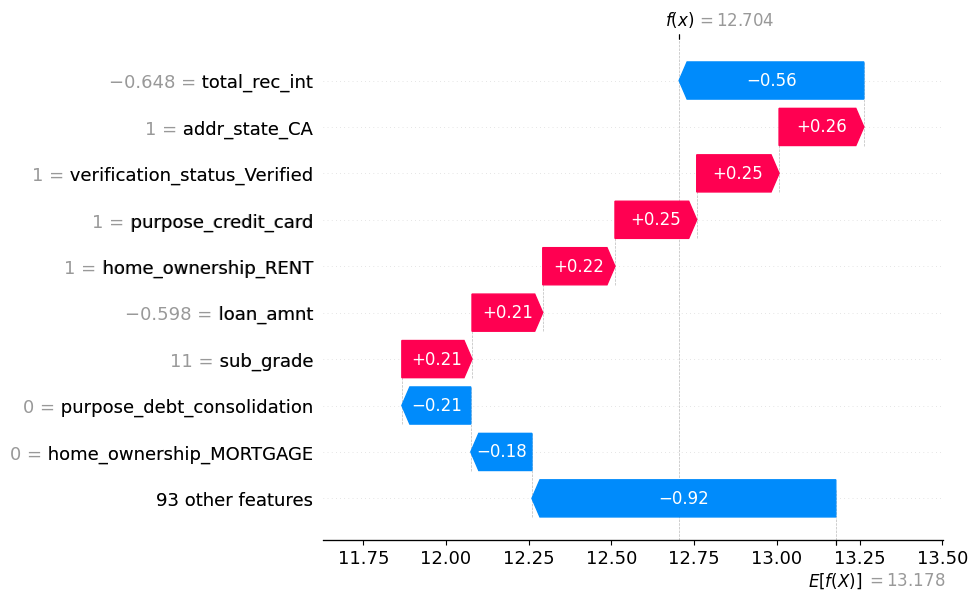

In [39]:
# SHAP Analysis

# Convert boolean columns to float for SHAP compatibility
X_train_modified = X_train_modified.astype(float)
X_test_modified = X_test_modified.astype(float)

# Set the background sample size to 100 (use the modified X_train without 'installment')
X_train_background = X_train_modified.sample(100, random_state=42)  # Randomly select 100 samples for background

# Use only 100 samples for the test data as well
X_test_sample = np.array(X_test_modified[:100], dtype=np.float32)

# Create the DeepExplainer for the neural network model with the background sample
explainer = shap.DeepExplainer(model, X_train_background)

# Compute SHAP values for the test set (sample size of 100)
shap_values = explainer.shap_values(X_test_sample)

# Handle SHAP values for single-output models and squeeze the extra dimension
if isinstance(shap_values, list):
    shap_values_corrected = shap_values[0].squeeze()  # Squeeze to remove extra dimension
else:
    shap_values_corrected = shap_values.squeeze()

# Convert X_test_sample to DataFrame for plotting (use the columns from X_test_modified)
X_test_sample_df = pd.DataFrame(X_test_sample, columns=X_test_modified.columns)

# Check the shapes of SHAP values and test data to confirm consistency
print("Shape of SHAP values:", shap_values_corrected.shape)
print("Shape of X_test_sample_df:", X_test_sample_df.shape)

# Plot the dependence plot for 'sub_grade'
if 'sub_grade' in X_test_sample_df.columns:
    shap.dependence_plot('sub_grade', shap_values_corrected, X_test_sample_df)
else:
    print("The feature 'sub_grade' is not in the dataset.")

# SHAP Summary Plot showing the top 10 important features
shap.summary_plot(shap_values_corrected, X_test_sample, feature_names=X_test_modified.columns, max_display=10)

# SHAP Summary Plot with bar chart for the top 10 features
shap.summary_plot(shap_values_corrected, X_test_sample, feature_names=X_test_modified.columns, max_display=10, plot_type='bar')

# Waterfall Plot for a specific instance (first test instance in this case)
instance_index = 0
instance_shap_values = shap_values_corrected[instance_index]

# Convert TensorFlow scalar expected_value to a numpy value
expected_value = explainer.expected_value[0].numpy() if isinstance(explainer.expected_value[0], tf.Tensor) else explainer.expected_value[0]

# Plot the waterfall plot for the first test instance
shap.waterfall_plot(
    shap.Explanation(
        values=instance_shap_values,
        base_values=expected_value,  # Convert TensorFlow scalar to numpy value
        data=X_test_sample_df.iloc[instance_index],
        feature_names=X_test_sample_df.columns
    )
)

Final XG Boost Model With Cross Validation (With and Without Subgrade) -- Engineered Data

In [40]:
from sklearn.model_selection import cross_val_score, KFold

# 1. Create a copy of the dataset without `sub_grade`
X_train_without_sub_grade = X_train.drop(columns=['sub_grade'])
X_test_without_sub_grade = X_test.drop(columns=['sub_grade'])

# 2. Define the 5-fold cross-validation scheme
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Cross-validation for the model with `sub_grade`
xgb_with_sub_grade_final_model = xgb.XGBRegressor(random_state=42)

# Perform cross-validation for RMSE and R²
cv_rmse_with = np.sqrt(-cross_val_score(xgb_with_sub_grade_final_model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf))
cv_r2_with = cross_val_score(xgb_with_sub_grade_final_model, X_train, y_train, scoring="r2", cv=kf)

# Print the individual cross-validation scores for RMSE and R²
print("\nCross-Validation Scores with sub_grade:")
print("RMSE Scores:", cv_rmse_with)
print("R² Scores:", cv_r2_with)

# Print the average cross-validation RMSE and R²
print(f"\nCV Results with sub_grade - RMSE: {cv_rmse_with.mean():.4f}, R²: {cv_r2_with.mean():.4f}")

# Fit the model after cross-validation
xgb_with_sub_grade_final_model.fit(X_train, y_train)

# Training and Testing Scores with `sub_grade`
y_train_pred_with = xgb_with_sub_grade_final_model.predict(X_train)
y_test_pred_with = xgb_with_sub_grade_final_model.predict(X_test)

train_rmse_with = np.sqrt(mean_squared_error(y_train, y_train_pred_with))
test_rmse_with = np.sqrt(mean_squared_error(y_test, y_test_pred_with))
train_r2_with = r2_score(y_train, y_train_pred_with)
test_r2_with = r2_score(y_test, y_test_pred_with)

print("\nTraining and Testing Scores with sub_grade:")
print(f"Train RMSE: {train_rmse_with:.4f}, Train R²: {train_r2_with:.4f}")
print(f"Test RMSE: {test_rmse_with:.4f}, Test R²: {test_r2_with:.4f}")

# 4. Cross-validation for the model without `sub_grade`
xgb_without_sub_grade_final_model = xgb.XGBRegressor(random_state=42)

# Perform cross-validation for RMSE and R²
cv_rmse_without = np.sqrt(-cross_val_score(xgb_without_sub_grade_final_model, X_train_without_sub_grade, y_train, scoring="neg_mean_squared_error", cv=kf))
cv_r2_without = cross_val_score(xgb_without_sub_grade_final_model, X_train_without_sub_grade, y_train, scoring="r2", cv=kf)

# Print the individual cross-validation scores for RMSE and R²
print("\nCross-Validation Scores without sub_grade:")
print("RMSE Scores:", cv_rmse_without)
print("R² Scores:", cv_r2_without)

# Print the average cross-validation RMSE and R²
print(f"\nCV Results without sub_grade - RMSE: {cv_rmse_without.mean():.4f}, R²: {cv_r2_without.mean():.4f}")

# Fit the model after cross-validation
xgb_without_sub_grade_final_model.fit(X_train_without_sub_grade, y_train)

# Training and Testing Scores without `sub_grade`
y_train_pred_without = xgb_without_sub_grade_final_model.predict(X_train_without_sub_grade)
y_test_pred_without = xgb_without_sub_grade_final_model.predict(X_test_without_sub_grade)

train_rmse_without = np.sqrt(mean_squared_error(y_train, y_train_pred_without))
test_rmse_without = np.sqrt(mean_squared_error(y_test, y_test_pred_without))
train_r2_without = r2_score(y_train, y_train_pred_without)
test_r2_without = r2_score(y_test, y_test_pred_without)

print("\nTraining and Testing Scores without sub_grade:")
print(f"Train RMSE: {train_rmse_without:.4f}, Train R²: {train_r2_without:.4f}")
print(f"Test RMSE: {test_rmse_without:.4f}, Test R²: {test_r2_without:.4f}")


Cross-Validation Scores with sub_grade:
RMSE Scores: [0.31386493 0.32514269 0.32104502 0.32006297 0.31831783]
R² Scores: [0.99491899 0.99456386 0.99468582 0.9946951  0.99480617]

CV Results with sub_grade - RMSE: 0.3197, R²: 0.9947

Training and Testing Scores with sub_grade:
Train RMSE: 0.3014, Train R²: 0.9953
Test RMSE: 0.3225, Test R²: 0.9946

Cross-Validation Scores without sub_grade:
RMSE Scores: [1.04555745 1.08418452 1.00419972 1.06479369 1.07283489]
R² Scores: [0.9436154  0.93955661 0.94800702 0.94128655 0.94100283]

CV Results without sub_grade - RMSE: 1.0543, R²: 0.9427

Training and Testing Scores without sub_grade:
Train RMSE: 1.0163, Train R²: 0.9468
Test RMSE: 1.0396, Test R²: 0.9443


Final XG Boost Model SHAP Analysis (With and Without Subgrade) -- Engineered Data


Performing SHAP analysis for the model with `sub_grade`...

Performing SHAP analysis for the model without `sub_grade`...

Displaying SHAP Summary Plot for the model with `sub_grade`...


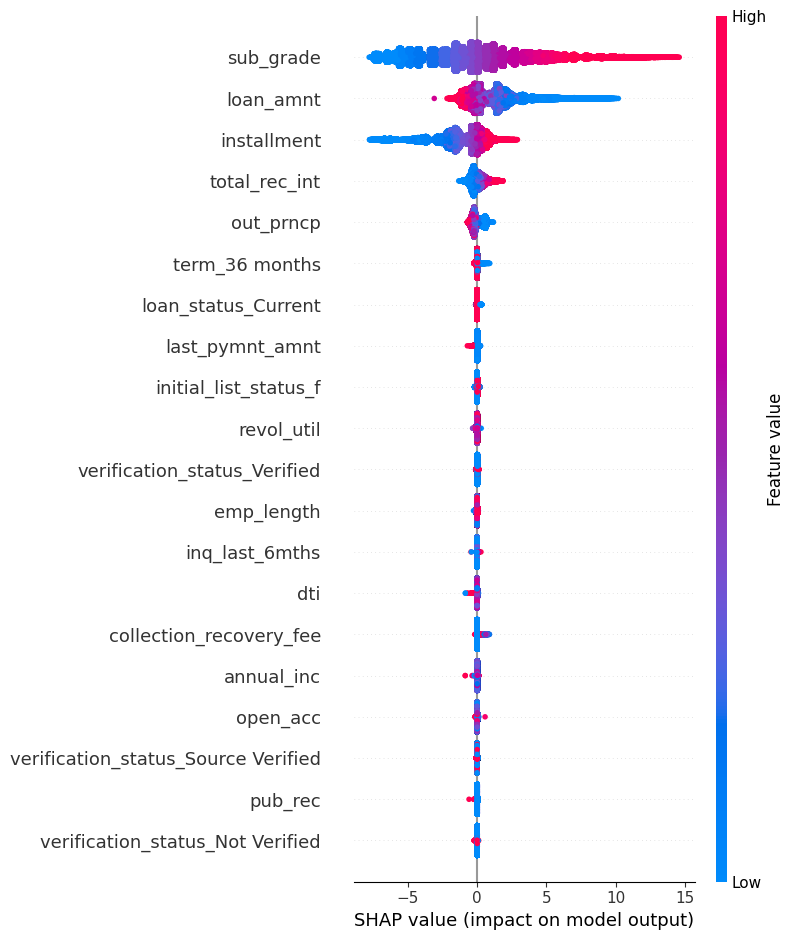


Displaying SHAP Summary Plot for the model without `sub_grade`...


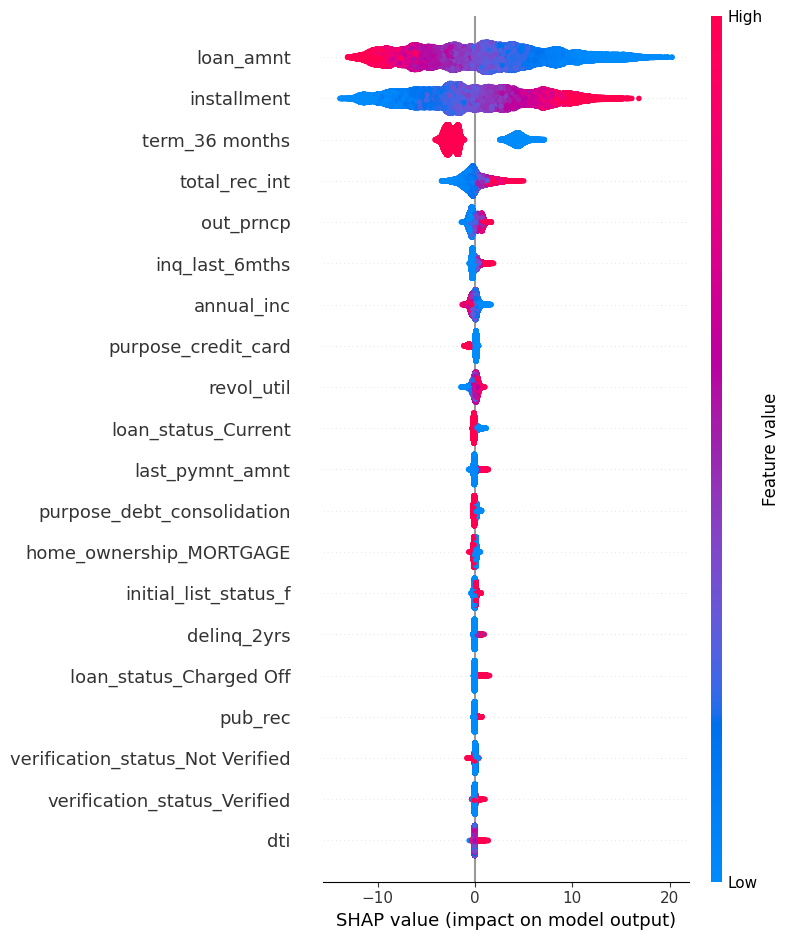


Displaying SHAP Bar Plot (Top 10 Features) for the model with `sub_grade`...


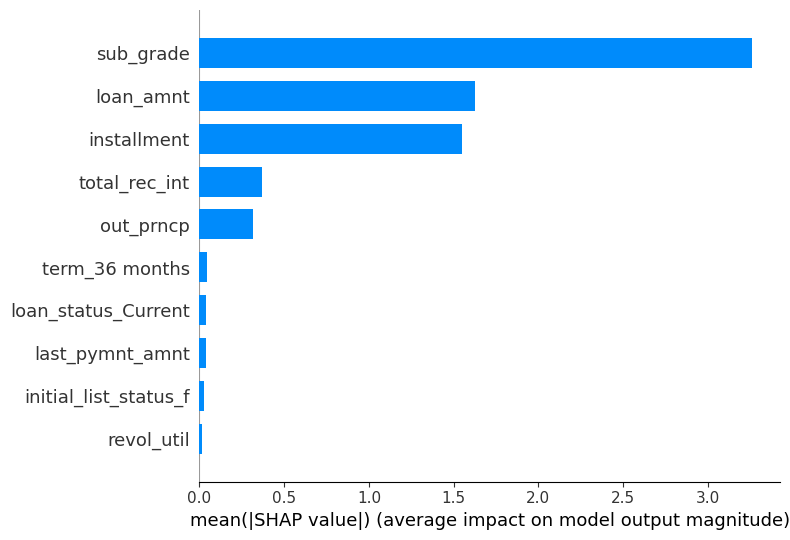


Displaying SHAP Bar Plot (Top 10 Features) for the model without `sub_grade`...


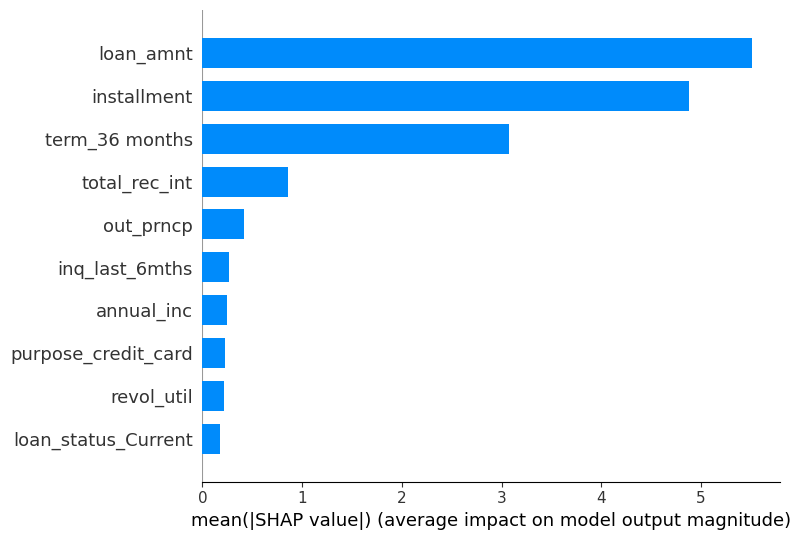


Displaying SHAP Waterfall Plot for instance 0 with `sub_grade`...


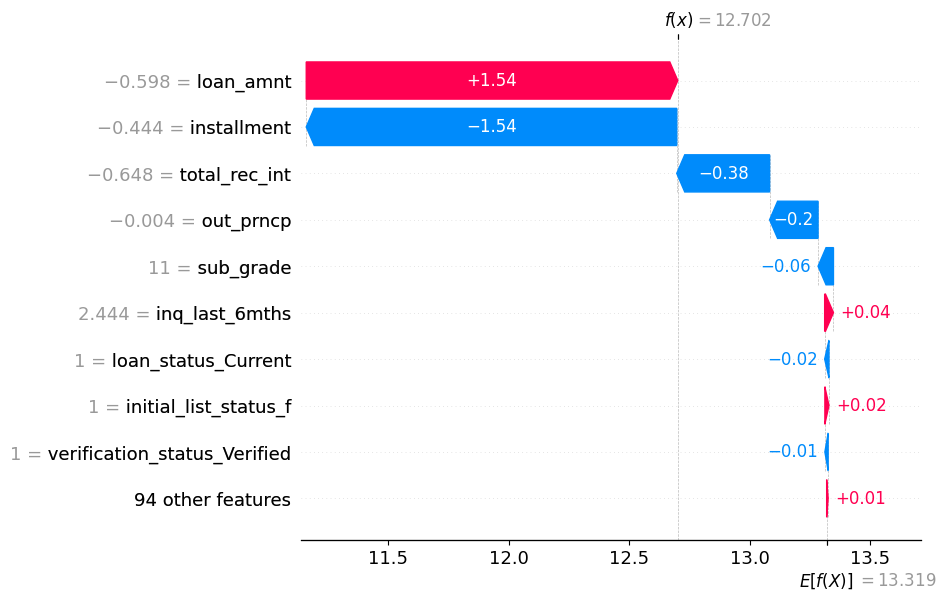


Displaying SHAP Waterfall Plot for instance 0 without `sub_grade`...


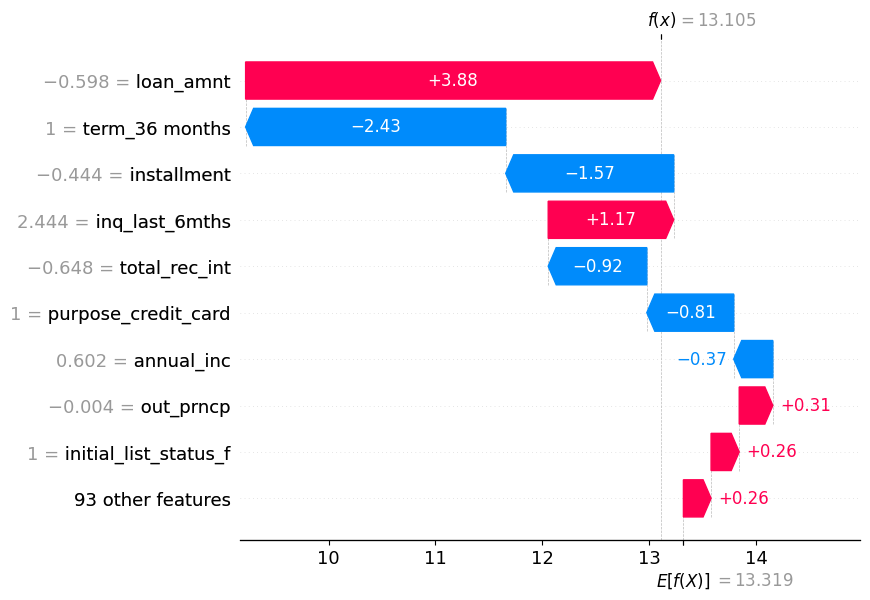

In [41]:
# Convert boolean columns to float for SHAP compatibility
X_train = X_train.astype(float)
X_train_without_sub_grade = X_train_without_sub_grade.astype(float)

# Set the background sample size to 100 for SHAP
X_train_background_with = X_train.sample(100, random_state=42)
X_train_background_without = X_train_without_sub_grade.sample(100, random_state=42)

# SHAP analysis for the model with `sub_grade`
print("\nPerforming SHAP analysis for the model with `sub_grade`...")
explainer_with_sub_grade = shap.TreeExplainer(xgb_with_sub_grade_final_model)
shap_values_with = explainer_with_sub_grade.shap_values(X_test)

# SHAP analysis for the model without `sub_grade`
print("\nPerforming SHAP analysis for the model without `sub_grade`...")
explainer_without_sub_grade = shap.TreeExplainer(xgb_without_sub_grade_final_model)
shap_values_without = explainer_without_sub_grade.shap_values(X_test_without_sub_grade)

# SHAP Summary Plot for the model with `sub_grade`
print("\nDisplaying SHAP Summary Plot for the model with `sub_grade`...")
shap.summary_plot(shap_values_with, X_test, feature_names=X_test.columns)

# SHAP Summary Plot for the model without `sub_grade`
print("\nDisplaying SHAP Summary Plot for the model without `sub_grade`...")
shap.summary_plot(shap_values_without, X_test_without_sub_grade, feature_names=X_test_without_sub_grade.columns)

# SHAP Bar Plot (Top 10 Features) for the model with `sub_grade`
print("\nDisplaying SHAP Bar Plot (Top 10 Features) for the model with `sub_grade`...")
shap.summary_plot(shap_values_with, X_test, feature_names=X_test.columns, plot_type="bar", max_display=10)

# SHAP Bar Plot (Top 10 Features) for the model without `sub_grade`
print("\nDisplaying SHAP Bar Plot (Top 10 Features) for the model without `sub_grade`...")
shap.summary_plot(shap_values_without, X_test_without_sub_grade, feature_names=X_test_without_sub_grade.columns, plot_type="bar", max_display=10)

# Optional: Waterfall plot for a specific instance (first test instance in this case)
instance_index = 0

# With sub_grade
print(f"\nDisplaying SHAP Waterfall Plot for instance {instance_index} with `sub_grade`...")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_with[instance_index],
        base_values=explainer_with_sub_grade.expected_value,
        data=X_test.iloc[instance_index],
        feature_names=X_test.columns
    )
)

# Without sub_grade
print(f"\nDisplaying SHAP Waterfall Plot for instance {instance_index} without `sub_grade`...")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_without[instance_index],
        base_values=explainer_without_sub_grade.expected_value,
        data=X_test_without_sub_grade.iloc[instance_index],
        feature_names=X_test_without_sub_grade.columns
    )
)